# Replica Exchange - Enveloping Distribution Sampling 


In [1]:
import reeds
help(reeds)

Help on package reeds:

NAME
    reeds

DESCRIPTION
    Replica Exchange - Enveloping Distribution Sampling - Project
    This Package is giving all code to the REEDS Projects.
    
    STRUCTURE
    ------------
    The project is structured into three folders:
    - The module folder, contains main functionality of the package and is a good start.
    - The function_libs folder contains all the code you could use in one of your own scripts.
    - The scripts folder contains code bits, that I'm sometimes using.
    
    REQUIREMENTS
    ------------
    * Python version: 3.6
    * Required packages:
        - Numpy
        - pandas
        - matplotlib
        - mdtraj
        - numpydoc
    
        - pygromos - also repository on the riniker gitlab

PACKAGE CONTENTS
    function_libs (package)

FILE
    /cluster/home/bschroed/code/reeds/__init__.py




In [2]:
#IMPORTs: 
import os, glob
from IPython.display import HTML, Image,Markdown

from pygromos.utils import bash
from pygromos.euler_submissions import FileManager as fM

# Global Definition

In [3]:

import os
from pygromos.utils import bash
from pygromos.euler_submissions import FileManager as fM

#needs to be provided via gromos compiling
gromosXX_bin = "/cluster/home/bschroed/gromos/gromos_native/gromosXX_mpi/bin"
gromosPP_bin = "/cluster/home/bschroed/gromos/gromos_native/gromos++/bin"
ene_ana_lib ="/cluster/home/bschroed/gromos/ene_ana_libs/ene_ana.md.lib"

#System Dependent settings:
name = "MY_NAME"
root_dir = os.getcwd()
input_folder =    root_dir+"/input/"

print(root_dir)


##input Files
###general Templates
in_template_md_imd = root_dir+"/input/template_md.imd"
in_template_reeds_imd = root_dir+"/input/template_reeds.imd"

###System dependent Files
in_cnf_file =     input_folder+"/PNMT_9lig_water.cnf"
in_top_file =     input_folder+"/PNMT_9lig_water.top"
in_pert_file =    input_folder+"/PNMT_9lig_water.ptp"
in_disres_file =  input_folder+"/PNMT_9lig_water_disres.dat"



# Optimize Single EDS-End states

In [6]:
from reeds.modules import do_RE_EDS_generateOptimizedStates as optimizeStates 
help(optimizeStates)

Help on module reeds.modules.do_RE_EDS_generateOptimizedStates in reeds.modules:

NAME
    reeds.modules.do_RE_EDS_generateOptimizedStates

DESCRIPTION
    Generate Optimized structures with EDS
    Description:
      This script executes simulations, that optimize the input EDS system in each state seperatley.
      The number of simulations is dependent on the ligands (endstates) of the system.
      Each simulation is biased towards one state via the Energy Offsets.
      After simulating the potentials energies get analysed and plotted.
      You should see, that in each simulation only one state is dominating the system. (e.g.: Check root_path_to_out_dir/analysis/sampling_undersampling.png)
    
      This output will be automatically used by do_RE_EDS_eoffEstimation.py(provide: "root_path_to_out_dir/simulation/")
    
      As input template file the file: .../reeds/gromos_files/imd_templates/eds_md.imd
    
      Further optimisations suggestions, if you can not generate the opt

In [4]:
#Setup Simulation Step:

out_gOptStates_dir = root_dir+"/a_optimizedState"
in_name = name+"_optimize_single_state"

out_gOptStates_dir = bash.make_folder(out_gOptStates_dir)


topology_state_opt = fM.Topology(top_path=in_top_file, 
                                 disres_path=in_disres_file, 
                                 pertubation_path=in_pert_file)

system_state_opt = fM.System(coordinates=in_cnf_file, name=in_name, top=topology_state_opt)

print(system_state_opt)

System
	name:  PNMT_9ligs_water_optimize_single_state
	top: 
		Topology
			top_path:  /cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/0_input/PNMT_9lig_water.top
			disres_path:  /cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/0_input/PNMT_9lig_water_disres.dat
			pertubation_path:  /cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/0_input/PNMT_9lig_water.ptp

	coordinates:  /cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/0_input/PNMT_9lig_water.cnf
	solvent:  None



## Job Execution

In [5]:
optimizeStates.do(in_simSystem=system_state_opt, in_imd_template_path=in_template_md_imd, 
                  out_root_dir=out_gOptStates_dir, in_gromosXX_bin_dir=gromosXX_bin)

NameError: name 'optimizeStates' is not defined

## Analysis

### Check optimized states

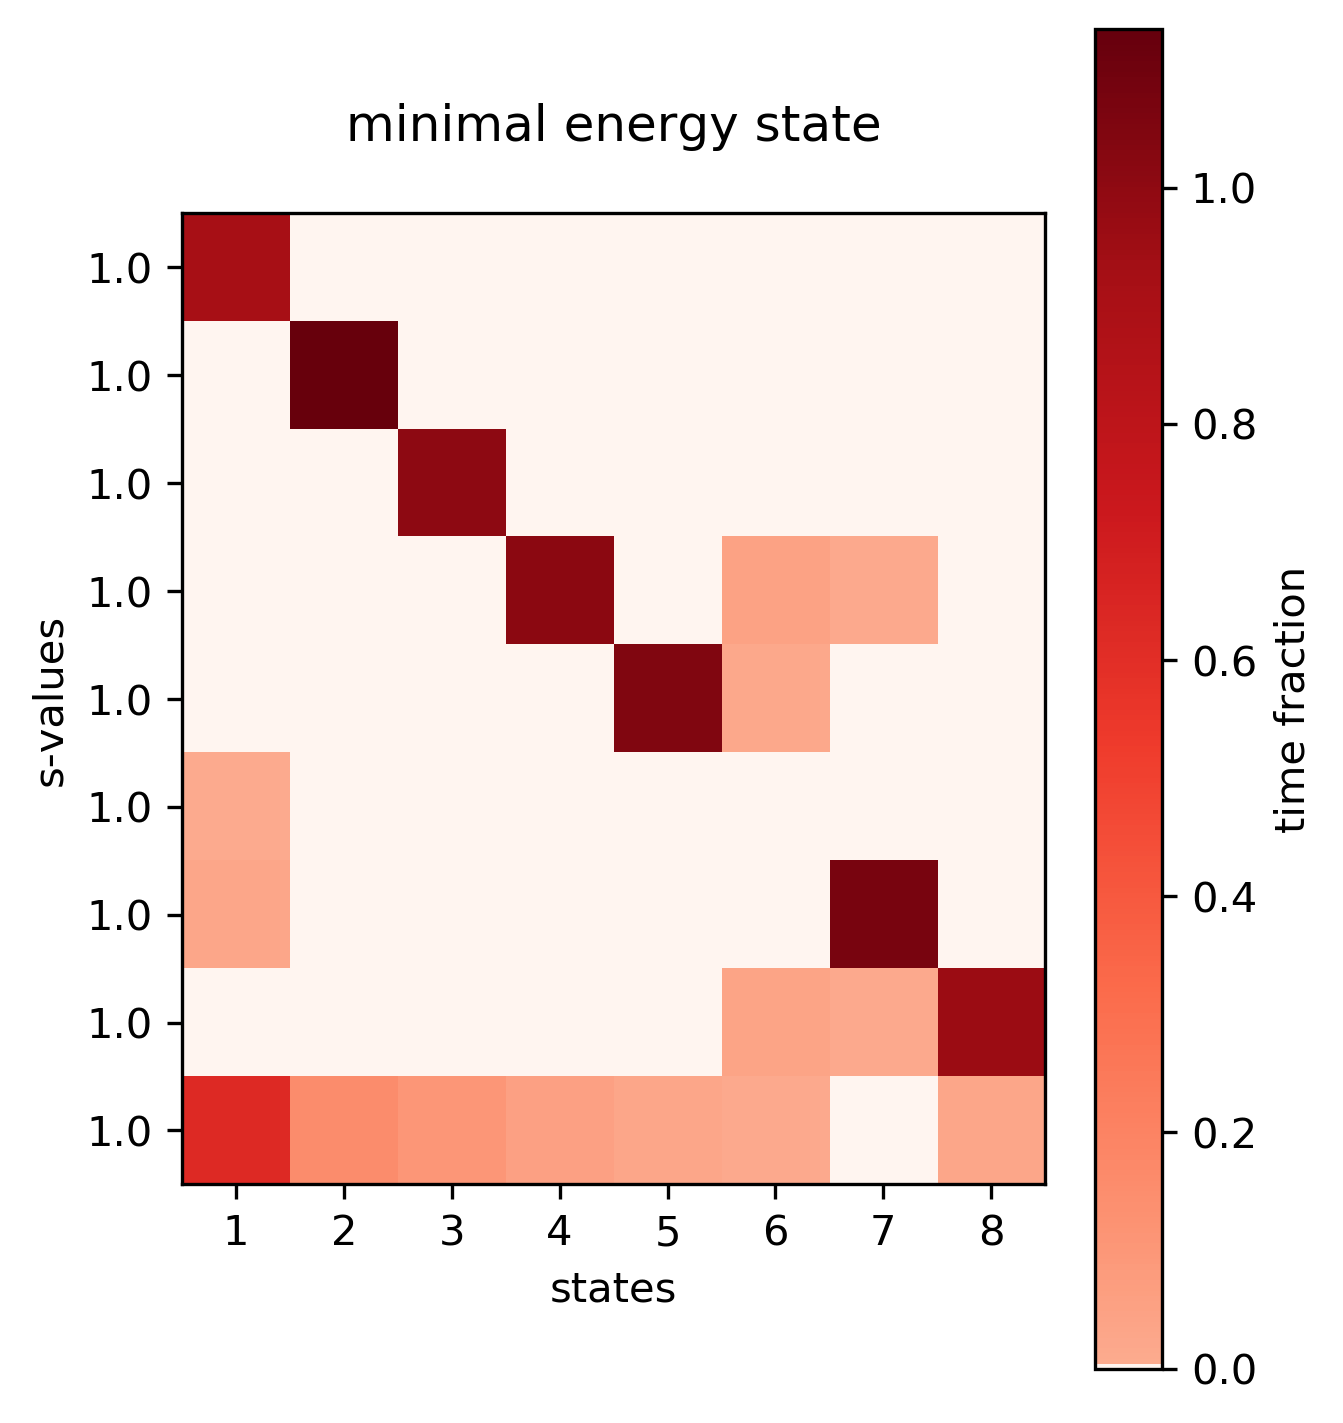

In [25]:
Image(out_gOptStates_dir+"/analysis/plots/sampling_minstate_matrix.png", width=300)

# Find lower Bound

In [ ]:
from reeds.modules import do_RE_EDS_findLowerBound as findLowerBound
help(findLowerBound)

In [11]:
out_lowerBound_dir = root_dir+"/b_lowerBound"
in_name = name+"_find_lower_bound"

out_lowerBound_dir = bash.make_folder(out_lowerBound_dir)


topology_lower_bound = fM.Topology(top_path=in_top_file, disres_path=in_disres_file, pertubation_path=in_pert_file)
system_lower_bound = fM.System(coordinates=in_cnf_file, name=in_name, top=topology_lower_bound)
print(system_lower_bound)

System
	name:  PNMT_9ligs_water_find_lower_bound
	top: 
		Topology
			top_path:  /cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/0_input/PNMT_9lig_water.top
			disres_path:  /cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/0_input/PNMT_9lig_water_disres.dat
			pertubation_path:  /cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/0_input/PNMT_9lig_water.ptp

	coordinates:  /cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/0_input/PNMT_9lig_water.cnf
	solvent:  None



## Job Execution

In [ ]:
findLowerBound.do(in_simSystem=system_lower_bound, template_imd=in_template_md_imd, 
                  out_root_dir=out_lowerBound_dir, 
                  gromosXX_bin=gromosXX_bin)

## Analysis

### Verify undersampling

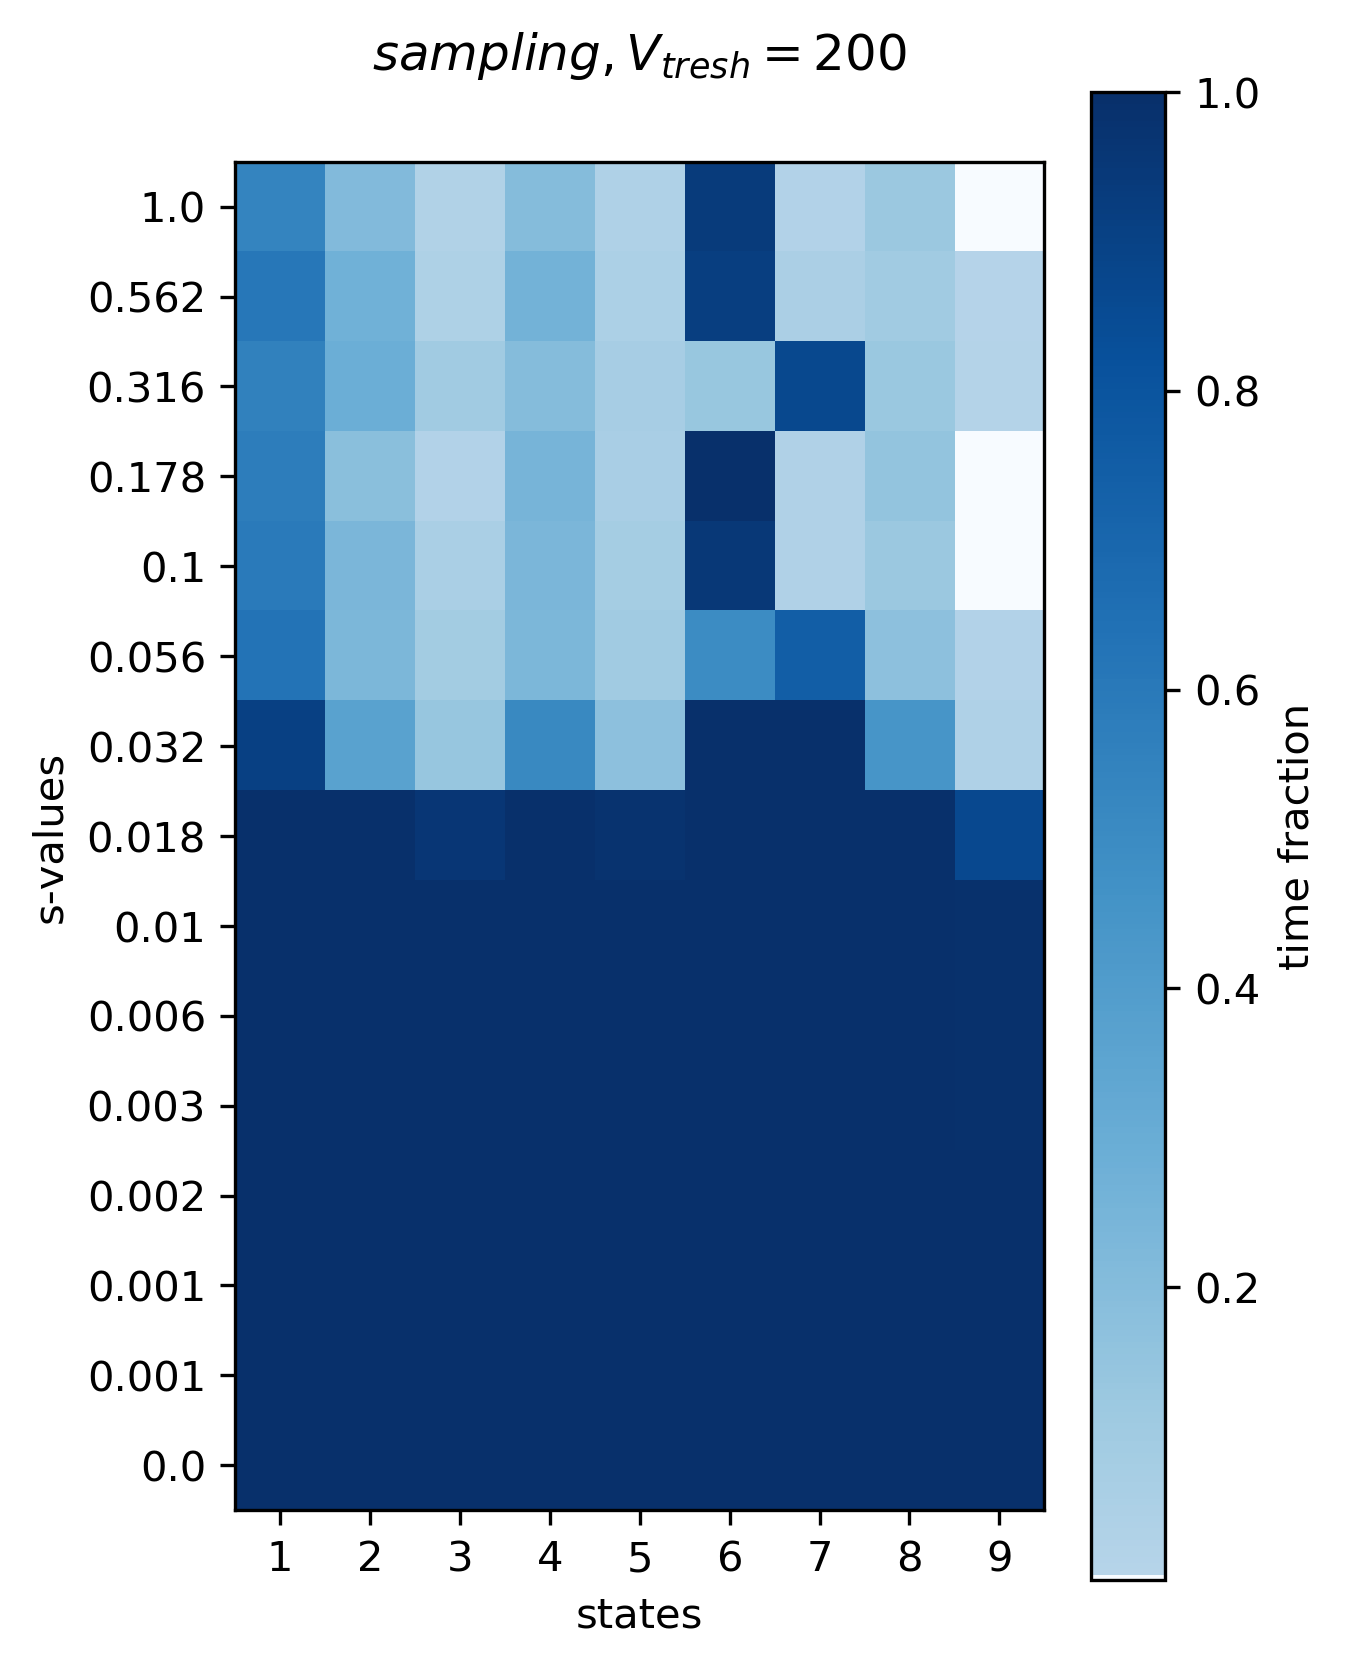

In [12]:
Image(out_lowerBound_dir+"/analysis/plots/sampling_undersample_matrix.png", width=300)

# Energy Offset Estimation

In [ ]:
from reeds.modules import do_RE_EDS_eoffEstimation as eoffEstm
help(eoffEstm)

In [28]:
out_eoff_dir = root_dir+"/c_eoff"
next_lowerBound_dir = root_dir+"/b_lower_bound/analysis/next"
in_name = name+"_energy_offsets"


out_eoff_dir = bash.make_folder(out_eoff_dir)


    
topology = fM.Topology(top_path=in_top_file, disres_path=in_disres_file, pertubation_path=in_pert_file)
system = fM.System(coordinates=glob.glob(next_lowerBound_dir+"/*.cnf"), name=in_name, top=topology)


## Job Execution

In [ ]:
last_jobID = eoffEstm.do(out_root_dir=out_eoff_dir, in_simSystem=system, 
                         in_template_imd_path=in_template_reeds_imd, 
                         in_ene_ana_lib=ene_ana_lib)

last_jobID

## Analysis

### Potential energies of the states

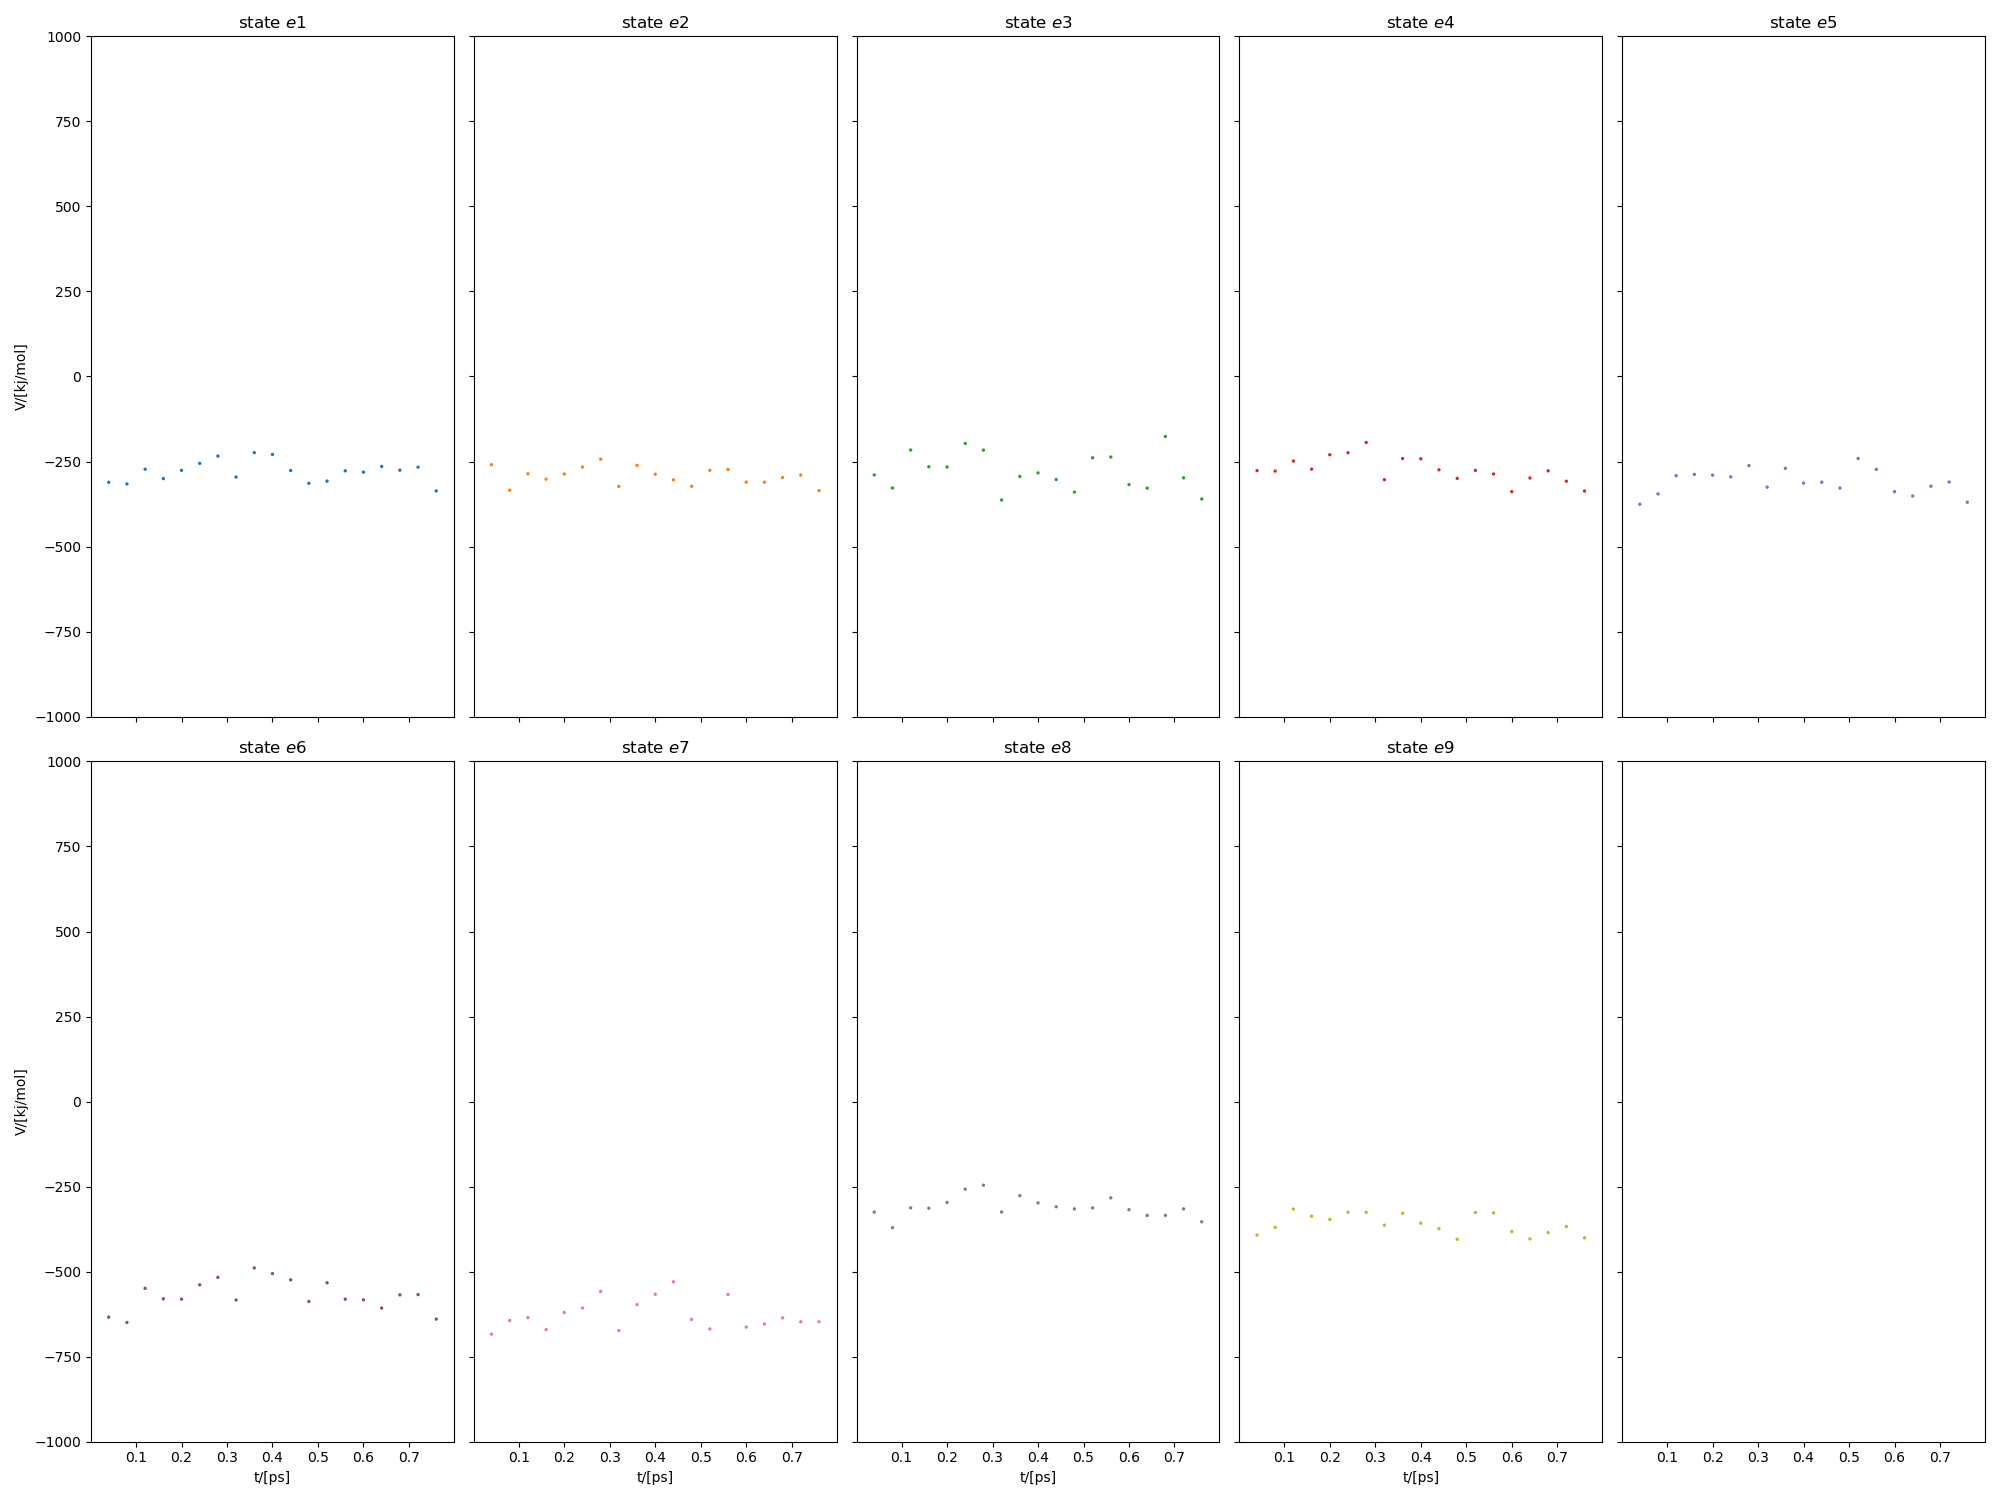

In [34]:
Image(out_eoff_dir+"/analysis/plots/edsState_potential_timeseries_stageGrid_s15.png", width=600)

### Check undersampling of the replicas

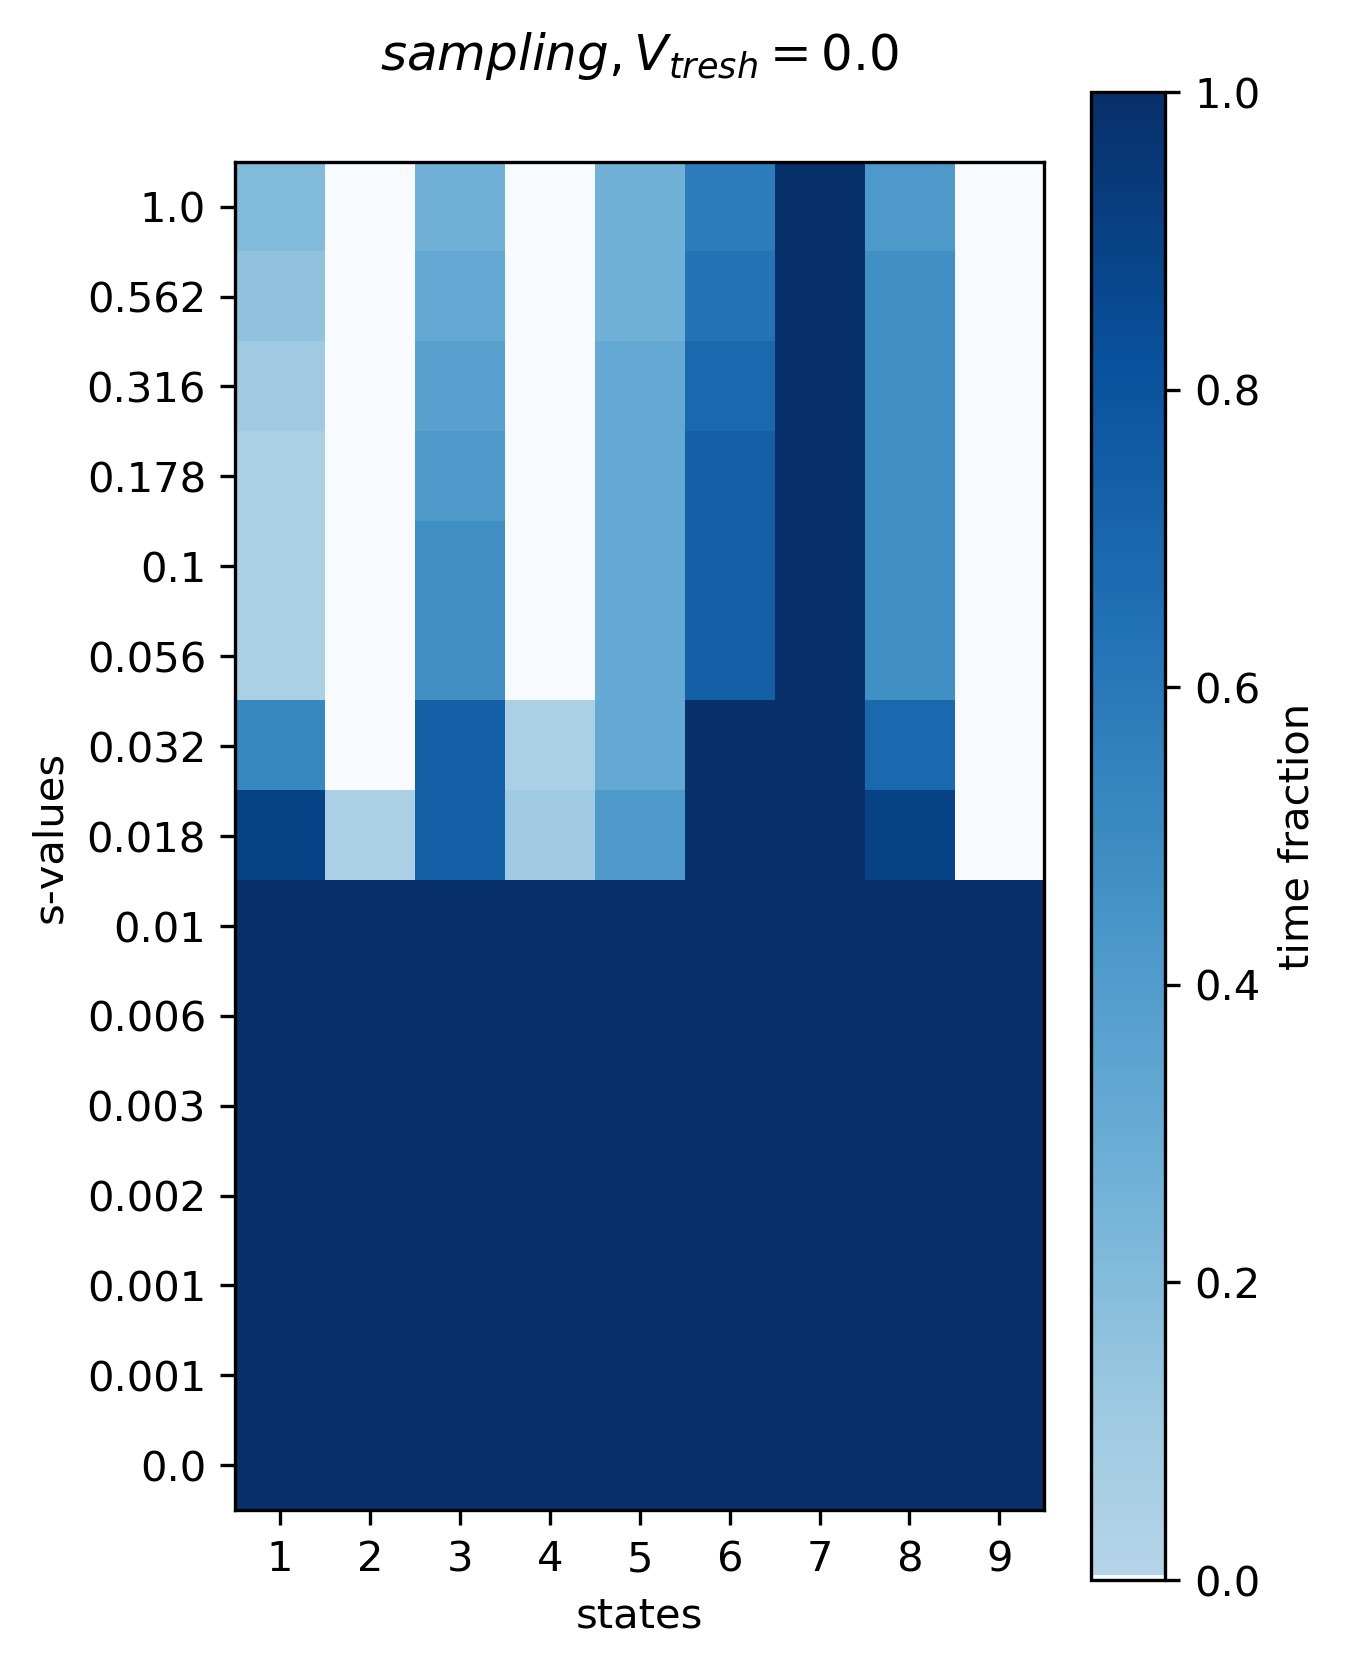

In [29]:
Image(out_eoff_dir+"/analysis/plots/sampling_undersample_matrix.png", width=300)

### Energy offset Estimation

In [100]:
Markdown(out_eoff_dir+"/analysis/Eoff_estimate.out")



REEDS - Eoff Estimation:
========================



	Energy Offsets for each Replica

| S	| e1 | e2 | e3 | e4 | e5 | e6 | e7 | e8 | e9 | iterations |
|---	|--- |---  |---  |---  |---  |---  |---  |---  |--- |--- |
|1.0000	|0.0 |	636.0681 |	158.943 |	370.8993 |	108.9934 |	-360.8402 |	-601.6696 |	69.0161 |	478469.9988 	|	1|
|0.5620	|0.0 |	643.8805 |	166.8479 |	360.0789 |	116.2305 |	-354.6437 |	-593.8572 |	76.8285 |	275003.5493 	|	1|
|0.3160	|0.0 |	643.7946 |	70.8092 |	360.0041 |	116.1558 |	-355.2782 |	-593.9319 |	76.7975 |	66055.4054 	|	1|
|0.1780	|0.0 |	548.9044 |	-24.0813 |	294.1459 |	21.5693 |	-457.057 |	-688.8221 |	-18.0927 |	65960.5152 	|	1|
|0.1000	|0.0 |	312.6528 |	-260.5298 |	507.5461 |	-214.6817 |	-693.5774 |	-925.0728 |	-254.4915 |	35255.692 	|	1|
|0.0562	|0.0 |	312.6482 |	-260.4845 |	507.5415 |	-214.7107 |	-697.292 |	-925.0303 |	-254.4928 |	35255.7417 	|	1|
|0.0316	|0.0 |	361.4541 |	37.7465 |	173.8266 |	84.033 |	-506.0606 |	-612.7407 |	-41.2746 |	35021.3534 	|	1|
|0.0178	|0.0 |	251.6421 |	90.1223 |	112.7153 |	-12.4274 |	-445.7497 |	-535.4198 |	-0.4714 |	33091.7281 	|	1|
|0.0100	|0.0 |	-1.361 |	47.1801 |	28.3029 |	-18.557 |	-371.3496 |	-395.9814 |	-19.4162 |	-33.1947 	|	1|
|0.0056	|0.0 |	1.1021 |	-14.9446 |	9.8619 |	-25.6958 |	-298.7615 |	-366.9213 |	-13.5085 |	-69.3831 	|	1|
|0.0032	|0.0 |	0.5878 |	-14.7208 |	9.1451 |	-28.1186 |	-297.3954 |	-364.1193 |	-17.1935 |	-70.4942 	|	1|
|0.0018	|0.0 |	3.4021 |	-15.1735 |	7.48 |	-28.8133 |	-293.9541 |	-364.0154 |	-17.2555 |	-68.9907 	|	1|
|0.0010	|0.0 |	4.1996 |	-14.3693 |	7.3393 |	-28.5365 |	-293.016 |	-361.7074 |	-17.1641 |	-68.4065 	|	1|
|0.0006	|0.0 |	4.9752 |	-14.4112 |	7.6172 |	-28.7545 |	-291.8812 |	-361.7002 |	-17.1837 |	-68.1541 	|	1|
|0.0003	|0.0 |	5.2779 |	-14.1929 |	7.6978 |	-28.7624 |	-291.6566 |	-360.9287 |	-17.1028 |	-67.9616 	|	1|


	Minimum energy count per state
| S	| e1 | e2 | e3 | e4 | e5 | e6 | e7 | e8 | e9 |
|---	|--- |---  |---  |---  |---  |---  |---  |---  |--- |
| 1.0000	|        0 |	        0 |	        0 |	        0 |	        0 |	        0 |	       19 |	        0 |	        0 |
| 0.5620	|        0 |	        0 |	        0 |	        0 |	        0 |	        0 |	       19 |	        0 |	        0 |
| 0.3160	|        0 |	        0 |	        0 |	        0 |	        0 |	        0 |	       19 |	        0 |	        0 |
| 0.1780	|        0 |	        0 |	        0 |	        0 |	        0 |	        0 |	       19 |	        0 |	        0 |
| 0.1000	|        0 |	        0 |	        0 |	        0 |	        0 |	        0 |	       19 |	        0 |	        0 |
| 0.0562	|        0 |	        0 |	        0 |	        0 |	        0 |	        0 |	       19 |	        0 |	        0 |
| 0.0316	|        0 |	        0 |	        0 |	        0 |	        0 |	        0 |	       19 |	        0 |	        0 |
| 0.0178	|        0 |	        0 |	        0 |	        0 |	        0 |	        0 |	       19 |	        0 |	        0 |
| 0.0100	|        0 |	        0 |	        0 |	        0 |	        0 |	        5 |	       14 |	        0 |	        0 |
| 0.0056	|        0 |	        0 |	        0 |	        0 |	        0 |	        1 |	       18 |	        0 |	        0 |
| 0.0032	|        0 |	        0 |	        0 |	        0 |	        0 |	        1 |	       18 |	        0 |	        0 |
| 0.0018	|        0 |	        0 |	        0 |	        0 |	        0 |	        2 |	       17 |	        0 |	        0 |
| 0.0010	|        0 |	        0 |	        0 |	        0 |	        0 |	        2 |	       17 |	        0 |	        0 |
| 0.0006	|        0 |	        0 |	        0 |	        0 |	        0 |	        2 |	       17 |	        0 |	        0 |
| 0.0003	|        0 |	        0 |	        0 |	        0 |	        0 |	        2 |	       17 |	        0 |	        0 |

	Negative energy count per state(pottresh=0.0)

| S	| e1 | e2 | e3 | e4 | e5 | e6 | e7 | e8 | e9|
|---	|--- |---  |---  |---  |---  |---  |---  |---  |--- |
1.0000	|        4 |	        0 |	        5 |	        0 |	        5 |	       11 |	       19 |	        8 |	        0 |
0.5620	|        3 |	        0 |	        6 |	        0 |	        5 |	       12 |	       19 |	        9 |	        0 |
0.3160	|        2 |	        0 |	        7 |	        0 |	        6 |	       13 |	       19 |	        9 |	        0 |
0.1780	|        1 |	        0 |	        8 |	        0 |	        6 |	       14 |	       19 |	        9 |	        0 |
0.1000	|        1 |	        0 |	        9 |	        0 |	        6 |	       14 |	       19 |	        9 |	        0 |
0.0562	|        1 |	        0 |	        9 |	        0 |	        6 |	       14 |	       19 |	        9 |	        0 |
0.0316	|       10 |	        0 |	       14 |	        1 |	        6 |	       19 |	       19 |	       13 |	        0 |
0.0178	|       17 |	        1 |	       14 |	        2 |	        8 |	       19 |	       19 |	       17 |	        0 |
0.0100	|       19 |	       19 |	       19 |	       19 |	       19 |	       19 |	       19 |	       19 |	       19 |
0.0056	|       19 |	       19 |	       19 |	       19 |	       19 |	       19 |	       19 |	       19 |	       19 |
0.0032	|       19 |	       19 |	       19 |	       19 |	       19 |	       19 |	       19 |	       19 |	       19 |
0.0018	|       19 |	       19 |	       19 |	       19 |	       19 |	       19 |	       19 |	       19 |	       19 |
0.0010	|       19 |	       19 |	       19 |	       19 |	       19 |	       19 |	       19 |	       19 |	       19 |
0.0006	|       19 |	       19 |	       19 |	       19 |	       19 |	       19 |	       19 |	       19 |	       19 |
0.0003	|       19 |	       19 |	       19 |	       19 |	       19 |	       19 |	       19 |	       19 |	       19 |

	Fraction of undersampling energies per state (fractresh=[0.1])

| S	| e1 | e2 | e3 | e4 | e5 | e6 | e7 | e8 | e9 |
|---		|---	 |---  |---  |---  |---  |---  |---  |---  |---  |
| 1.0000	|   0.2105 |	   0.0000 |	   0.2632 |	   0.0000 |	   0.2632 |	   0.5789 |	   1.0000 |	   0.4211 |	   0.0000
| 0.5620	|   0.1579 |	   0.0000 |	   0.3158 |	   0.0000 |	   0.2632 |	   0.6316 |	   1.0000 |	   0.4737 |	   0.0000
| 0.3160	|   0.1053 |	   0.0000 |	   0.3684 |	   0.0000 |	   0.3158 |	   0.6842 |	   1.0000 |	   0.4737 |	   0.0000
| 0.1780	|   0.0526 |	   0.0000 |	   0.4211 |	   0.0000 |	   0.3158 |	   0.7368 |	   1.0000 |	   0.4737 |	   0.0000
| 0.1000	|   0.0526 |	   0.0000 |	   0.4737 |	   0.0000 |	   0.3158 |	   0.7368 |	   1.0000 |	   0.4737 |	   0.0000
| 0.0562	|   0.0526 |	   0.0000 |	   0.4737 |	   0.0000 |	   0.3158 |	   0.7368 |	   1.0000 |	   0.4737 |	   0.0000
| 0.0316	|   0.5263 |	   0.0000 |	   0.7368 |	   0.0526 |	   0.3158 |	   1.0000 |	   1.0000 |	   0.6842 |	   0.0000
| 0.0178	|   0.8947 |	   0.0526 |	   0.7368 |	   0.1053 |	   0.4211 |	   1.0000 |	   1.0000 |	   0.8947 |	   0.0000
| 0.0100	|   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000
| 0.0056	|   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000
| 0.0032	|   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000
| 0.0018	|   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000
| 0.0010	|   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000
| 0.0006	|   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000
| 0.0003	|   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000 |	   1.0000


New energy offset for each state:

1.     0.0000	+-	  0.0000
2.     2.5977	+-	  2.3298
3.    -5.8046	+-	 21.6332
4.    11.0635	+-	  7.0936
5.   -26.7483	+-	  3.4975
6.  -305.4306	+-	 27.0278
7.  -367.9105	+-	 11.6146
8.   -16.9749	+-	  1.6124
9.   -63.7978	+-	 12.5192


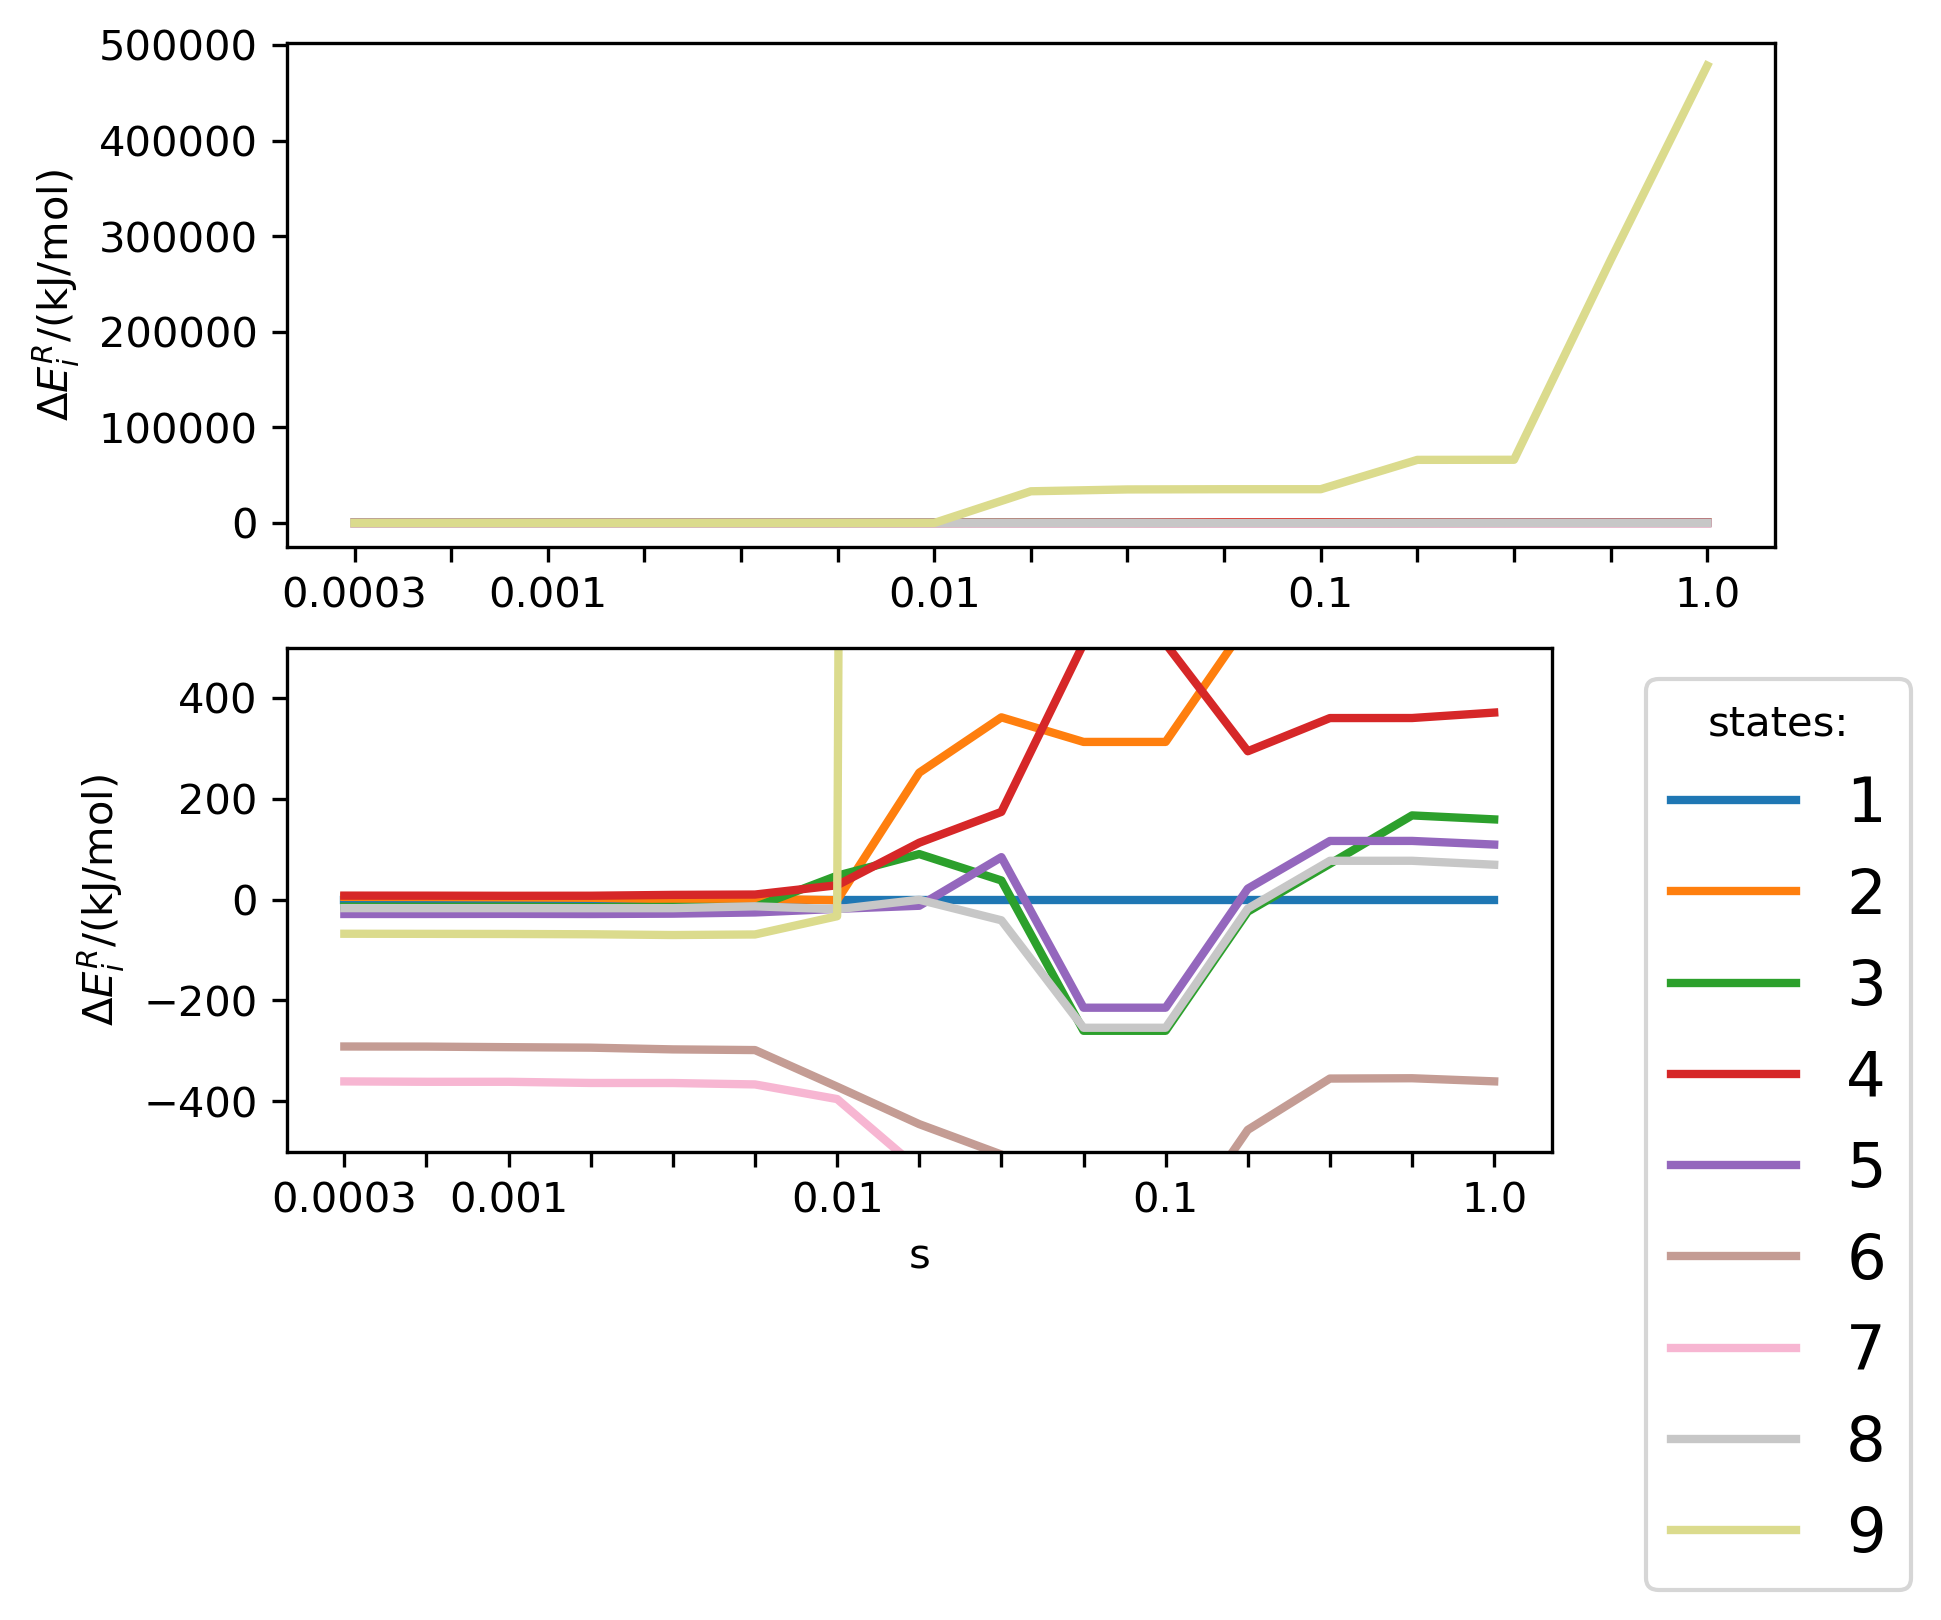

In [89]:
Image(out_eoff_dir+"/analysis/plots/PNMT_9ligs_water_energy_offsets_eoff_s.png", width=600)

### Bottle neck

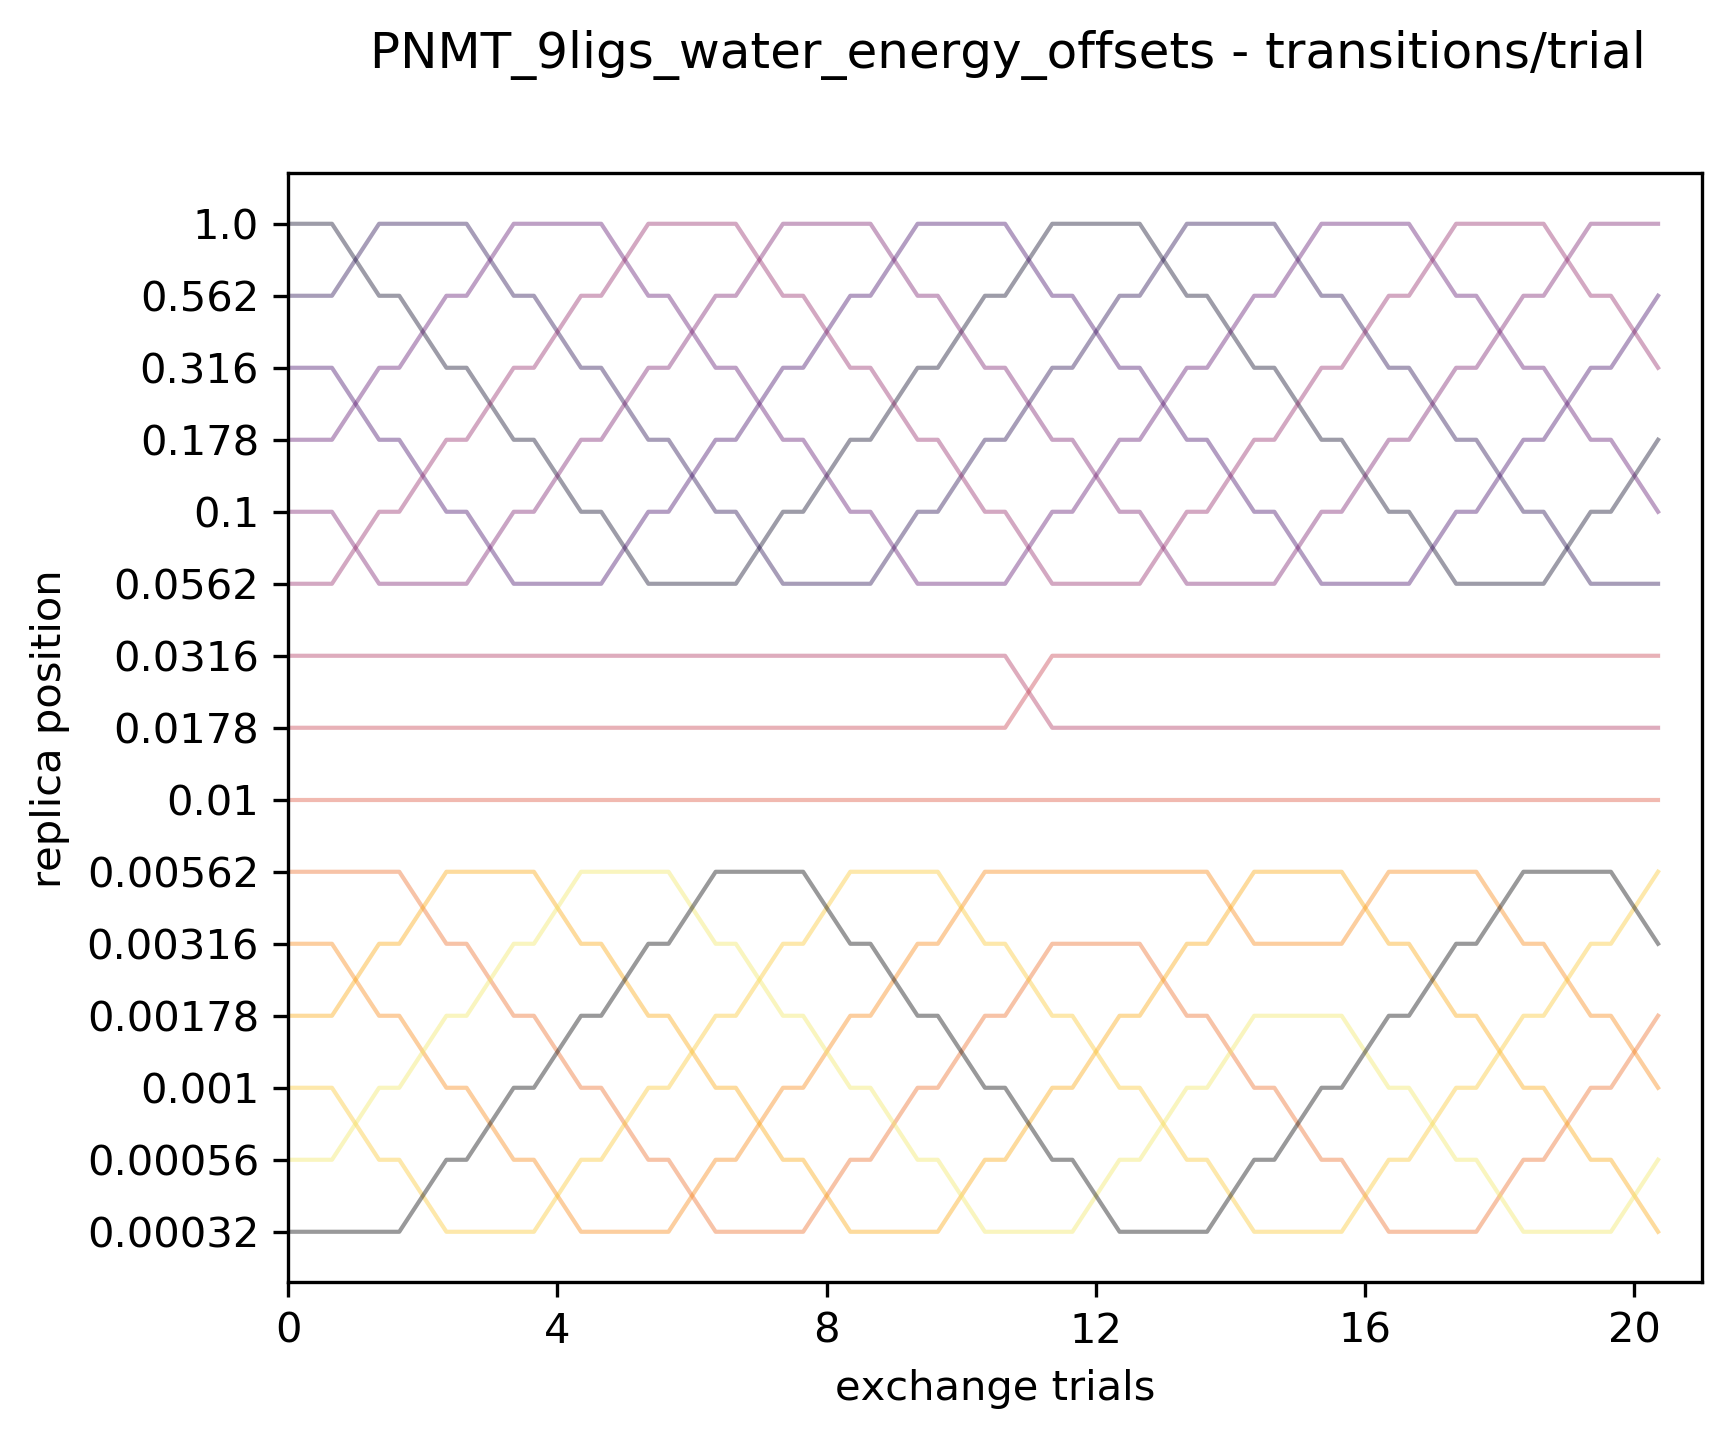

In [36]:
Image(out_eoff_dir+"/analysis/plots/transitions.png", width=600)

# s-Optimization

In [ ]:
from reeds.modules import do_RE_EDS_sOptimisation as sOptimization
help(sOptimization)

In [41]:
out_sopt_dir = root_dir+"/d_sopt"
next_sopt_dir = root_dir+"/c_eoff/analysis/next"
name = "PNMT_9ligs_water_sopt"

soptIterations =4

in_template_reeds_imd = glob.glob(next_sopt_dir+"/*imd")[0]

out_sopt_dir = bash.make_folder(out_sopt_dir)

        
topology = fM.Topology(top_path=in_top_file, disres_path=in_disres_file, pertubation_path=in_pert_file)
system_sopt = fM.System(coordinates=glob.glob(next_sopt_dir+"/*cnf"), name=name, top=topology)
print(system)

System
	name:  PNMT_9ligs_water_sopt
	top: 
		Topology
			top_path:  /cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/0_input/PNMT_9lig_water.top
			disres_path:  /cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/0_input/PNMT_9lig_water_disres.dat
			pertubation_path:  /cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/0_input/PNMT_9lig_water.ptp

	coordinates:  /cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/0_input/2_next_sopt/PNMT_bs_9_lig_work_17.cnf
	/cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/0_input/2_next_sopt/PNMT_bs_9_lig_work_4.cnf
	/cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/0_input/2_next_sopt/PNMT_bs_9_lig_work_9.cnf
	/cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/0_input/2_next_sopt/PNMT_bs_9_lig_work_6.cnf
	/cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/0_input/2_next_sopt/PNMT_bs_9_lig_work_1.cnf
	/cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/0_input/2_next_sopt/PNMT_bs_9_lig_work_7.cnf
	/cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/0_input/2_next_sopt/PNMT_bs_

## Job Execution

In [ ]:
last_jobID = sOptimization.do(out_root_dir=out_sopt_dir, in_simSystem=system, 
                              in_template_imd=in_template_reeds_imd, 
                              in_ene_ana_lib_path=ene_ana_lib, 
                              soptIterations=soptIterations)


## Analysis

### Increase Replica Exchanges with N-LRTO
#### sopt1

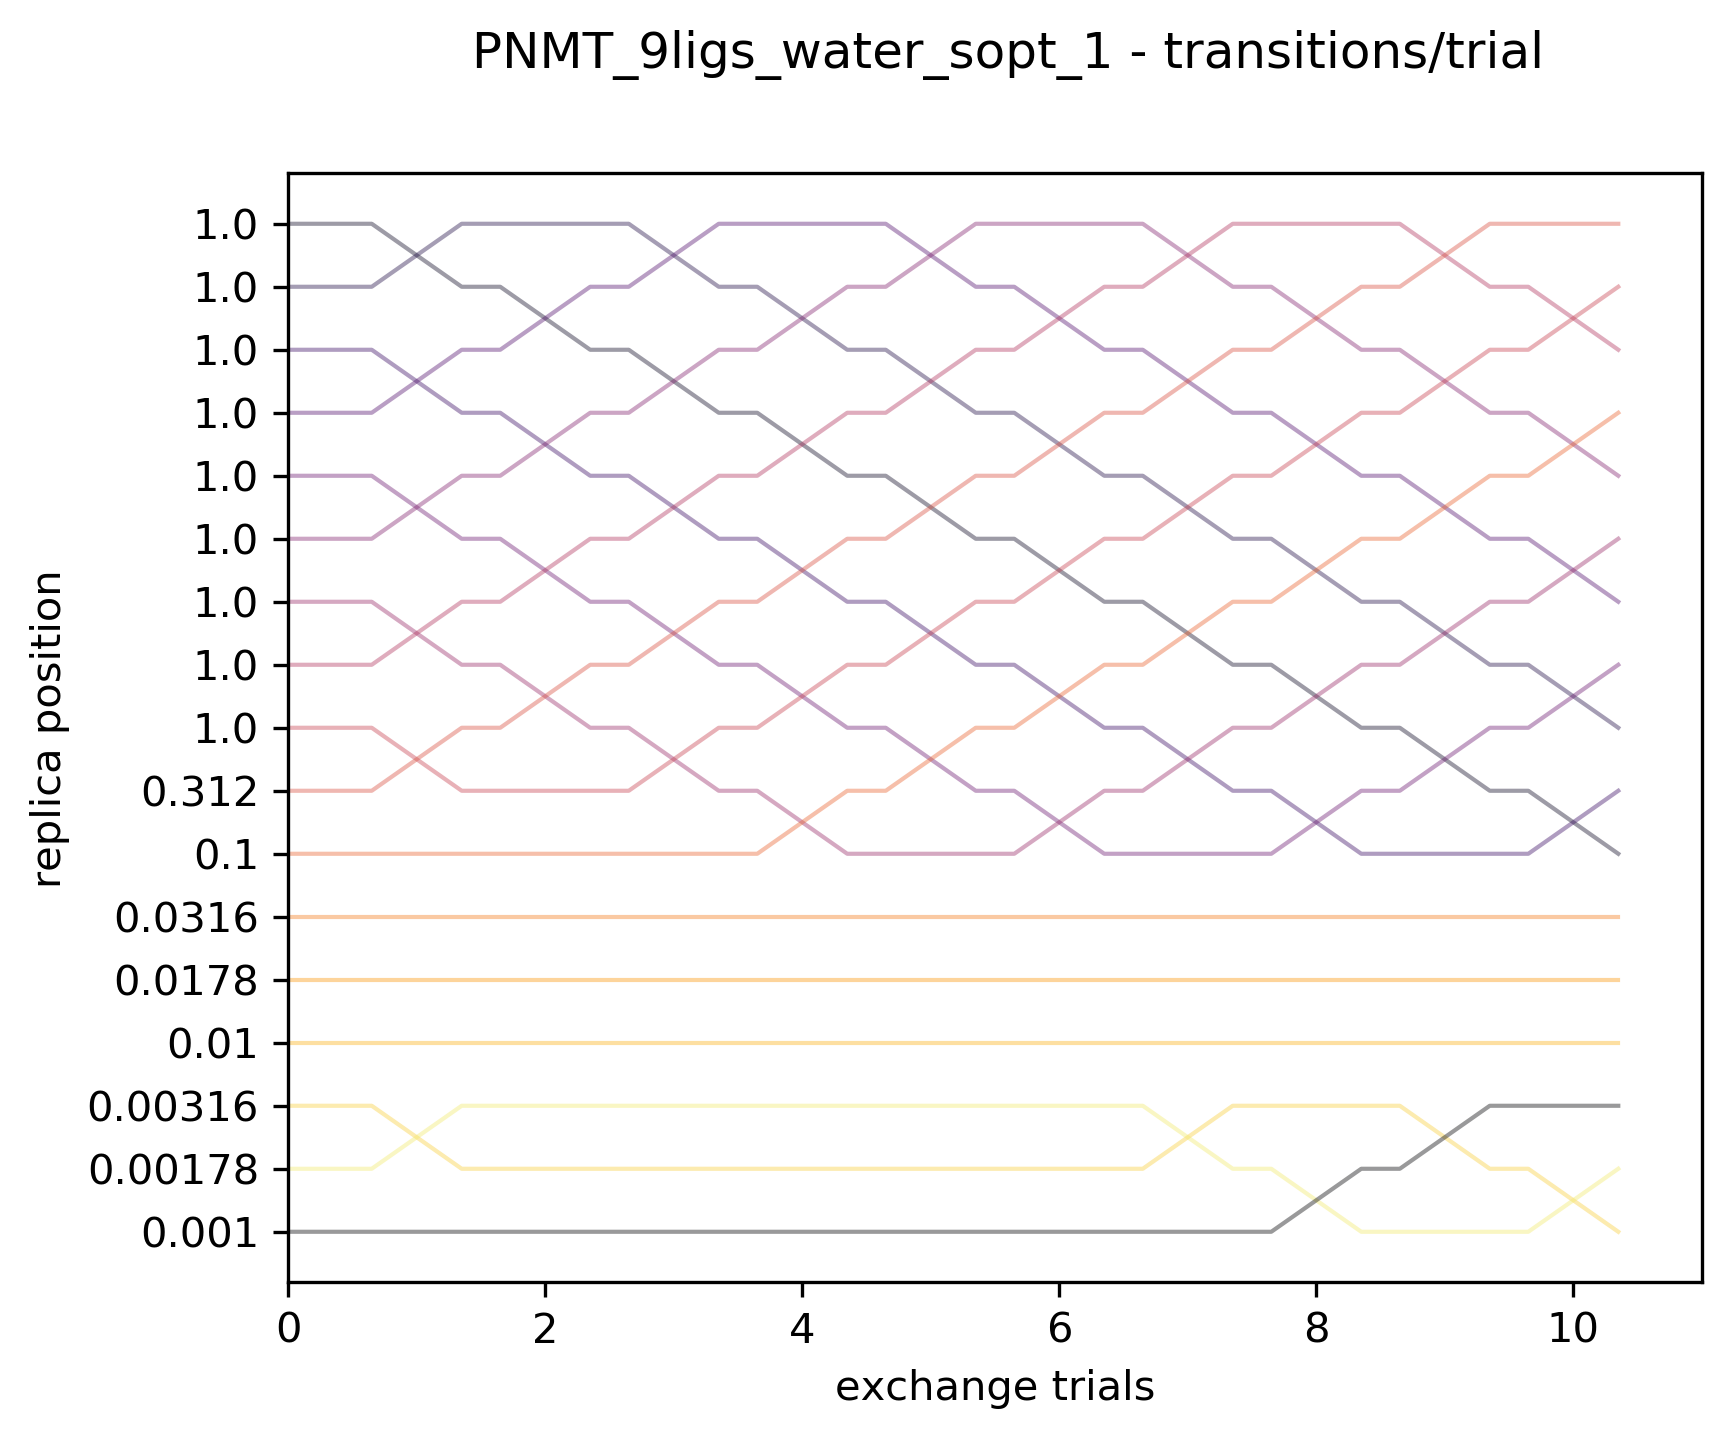

In [43]:
Image(out_sopt_dir+"/sopt1/analysis/plots/transitions.png", width=600)

In [115]:
Markdown(out_sopt_dir+"/sopt1/analysis/s_opt_NLRTO.out")


SOPT - N-LRTO
=================

	> State-WEIGHTS: 0.1111111111111111	0.1111111111111111	0.1111111111111111	0.1111111111111111	0.1111111111111111	0.1111111111111111	0.1111111111111111	0.1111111111111111	0.1111111111111111


## FLOW STATISTICS

|s        | n_up    |  n_down_state_1|	n_down_state_2|	n_down_state_3|	n_down_state_4|	n_down_state_5|	n_down_state_6|	n_down_state_7|	n_down_state_8|	n_down_state_9|
|---	|---	|---	|---	|---	|---	|---	|---	|---	|---	|---	|
|	1.000000 |       0 |       4|	       0|	       0|	       0|	       5|	       1|	       0|	       0|	       0|
|	0.312000 |       1 |       1|	       0|	       0|	       0|	       4|	       4|	       0|	       0|	       0|
|	0.100000 |       1 |       1|	       0|	       0|	       0|	       3|	       5|	       0|	       0|	       0|
|	0.031600 |       0 |       0|	       0|	       0|	       0|	       6|	       4|	       0|	       0|	       0|
|	0.017800 |       1 |       2|	       0|	       0|	       0|	       6|	       1|	       0|	       0|	       0|
|	0.010000 |       6 |       0|	       0|	       0|	       0|	       3|	       1|	       0|	       0|	       0|
|	0.003160 |       1 |       0|	       0|	       0|	       0|	       6|	       0|	       3|	       0|	       0|
|	0.001780 |       1 |       0|	       0|	       0|	       0|	       1|	       0|	       8|	       0|	       0|
|	0.001000 |       7 |       0|	       0|	       0|	       0|	       1|	       0|	       2|	       0|	       0|

## ADDED-S

|     repID|	         s|	      f(s)|	svals_in_interval|
|       ---|	       ---|	       ---|	       ---|
|         9|	       1.0|	    0.3333|	         1|
|        10|	     0.312|	    0.3162|	         1|
|        11|	       0.1|	    0.3158|	         1|
|        12|	    0.0316|	    0.2222|	         3|
|        13|	    0.0178|	    0.3144|	         2|
|        14|	      0.01|	    0.1576|	         4|
|        15|	   0.00316|	    0.2162|	         2|
|        16|	   0.00178|	    0.2096|	         1|
|        17|	     0.001|	    0.1425|	         2|

## S_VALUES


### Input s_values: used for statistics: #9
 >   1.00000  0.31200  0.10000  0.03160  0.01780  0.01000  0.00316  0.00178  0.00100



### New s_values: #17
 >   1.00000  0.31200  0.10000  0.07720  0.05440  0.03160  0.02470  0.01780  0.01585  0.01390
  0.01195  0.01000  0.00658  0.00316  0.00178  0.00139  0.00100



### New s values including skipped values: #25
 >   1.00000  1.00000  1.00000  1.00000  1.00000  1.00000  1.00000  1.00000  1.00000  0.31200
  0.10000  0.07720  0.05440  0.03160  0.02470  0.01780  0.01585  0.01390  0.01195  0.01000
  0.00658  0.00316  0.00178  0.00139  0.00100





#### sopt2

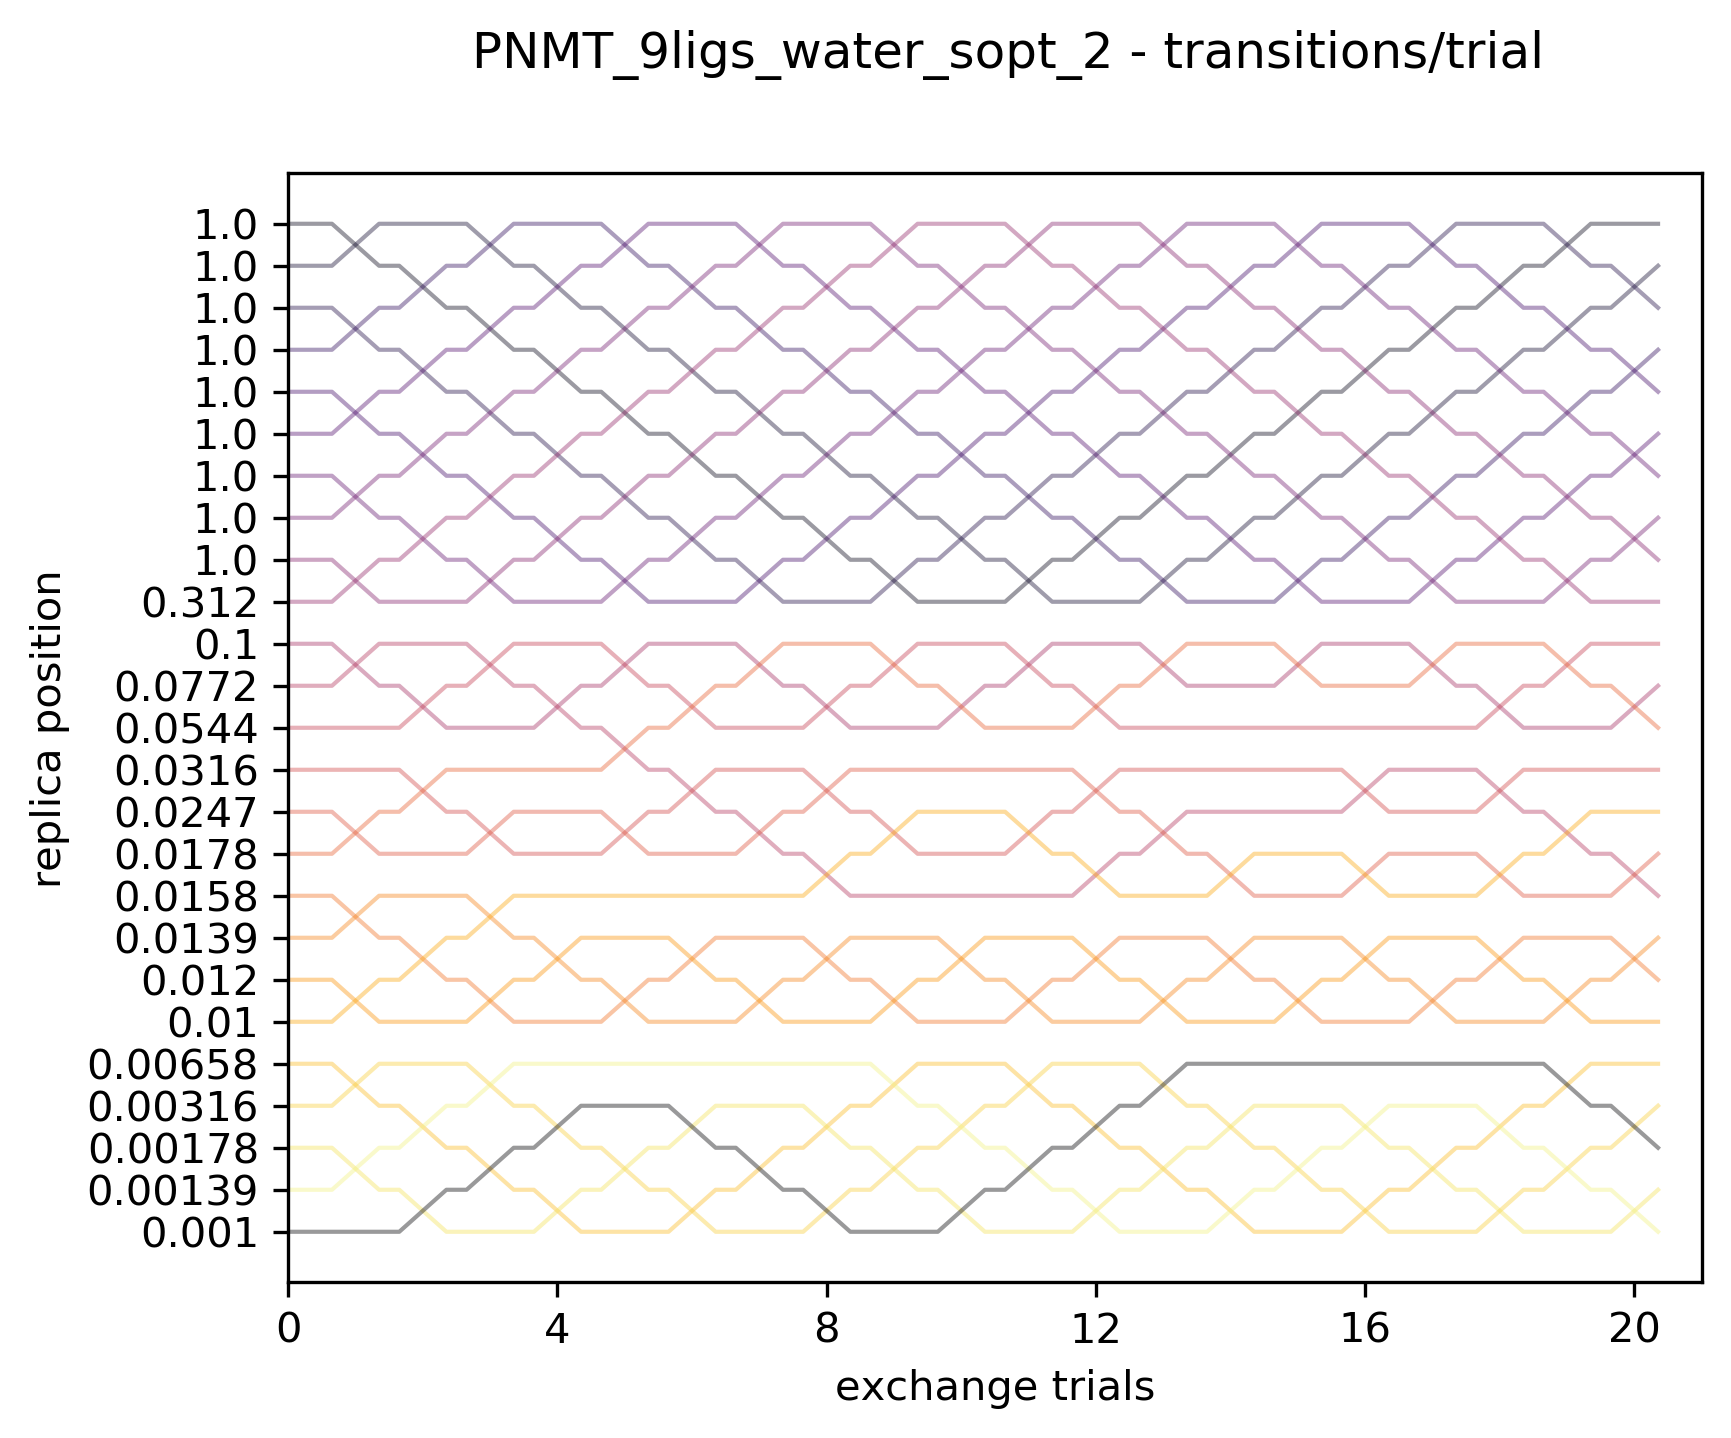

In [45]:
Image(out_sopt_dir+"/sopt2/analysis/plots/transitions.png", width=600)

In [112]:
Markdown(out_sopt_dir+"/sopt2/analysis/s_opt_NLRTO.out")

/cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/test_d_sopt/sopt2/analysis/s_opt_NLRTO.out

#### sopt3 

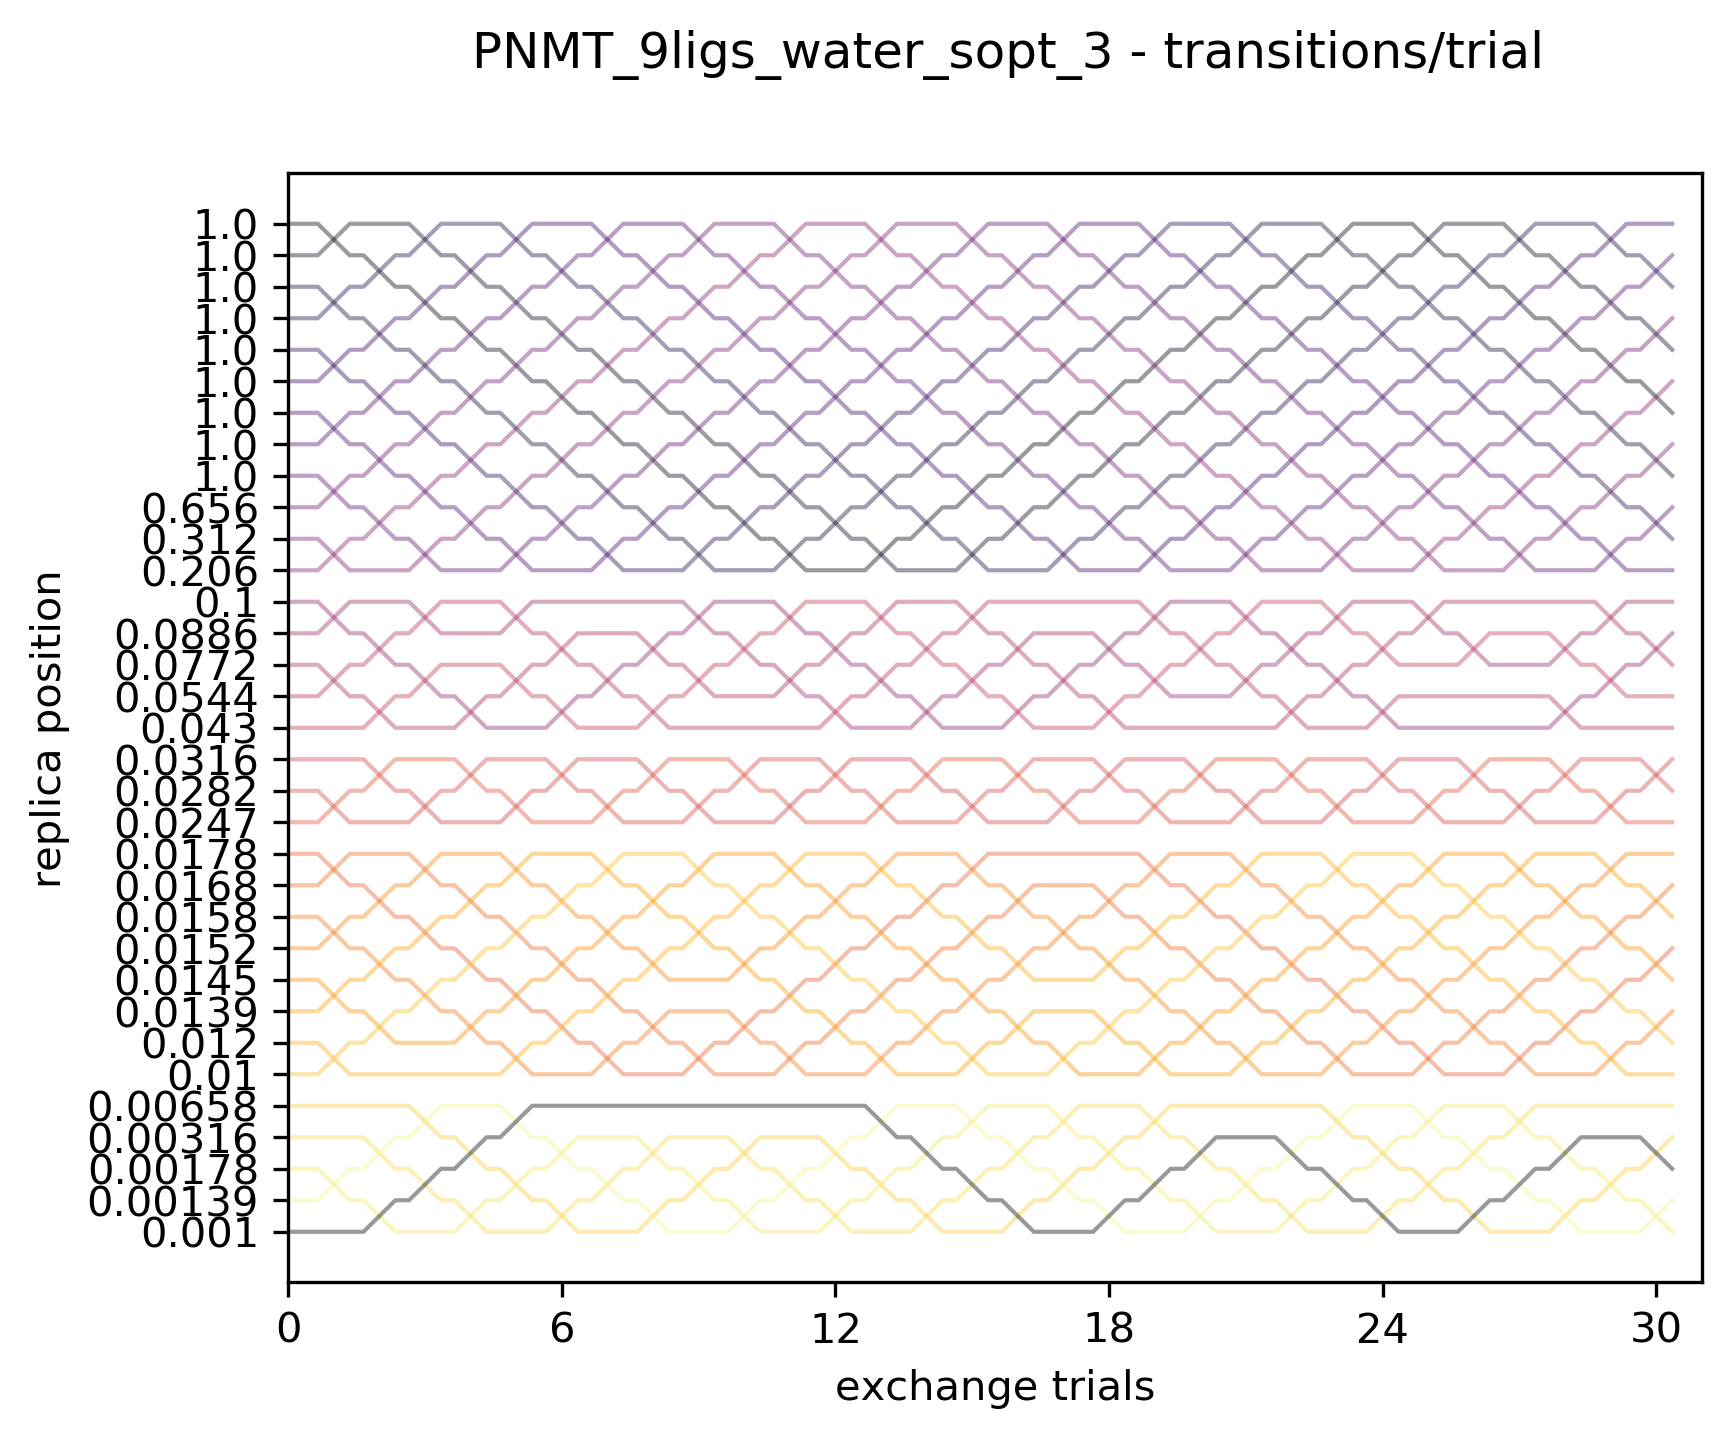

In [46]:
Image(out_sopt_dir+"/sopt3/analysis/plots/transitions.png", width=600)

In [116]:
Markdown(out_sopt_dir+"/sopt3/analysis/s_opt_NLRTO.out")

/cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/test_d_sopt/sopt3/analysis/s_opt_NLRTO.out

#### sopt4

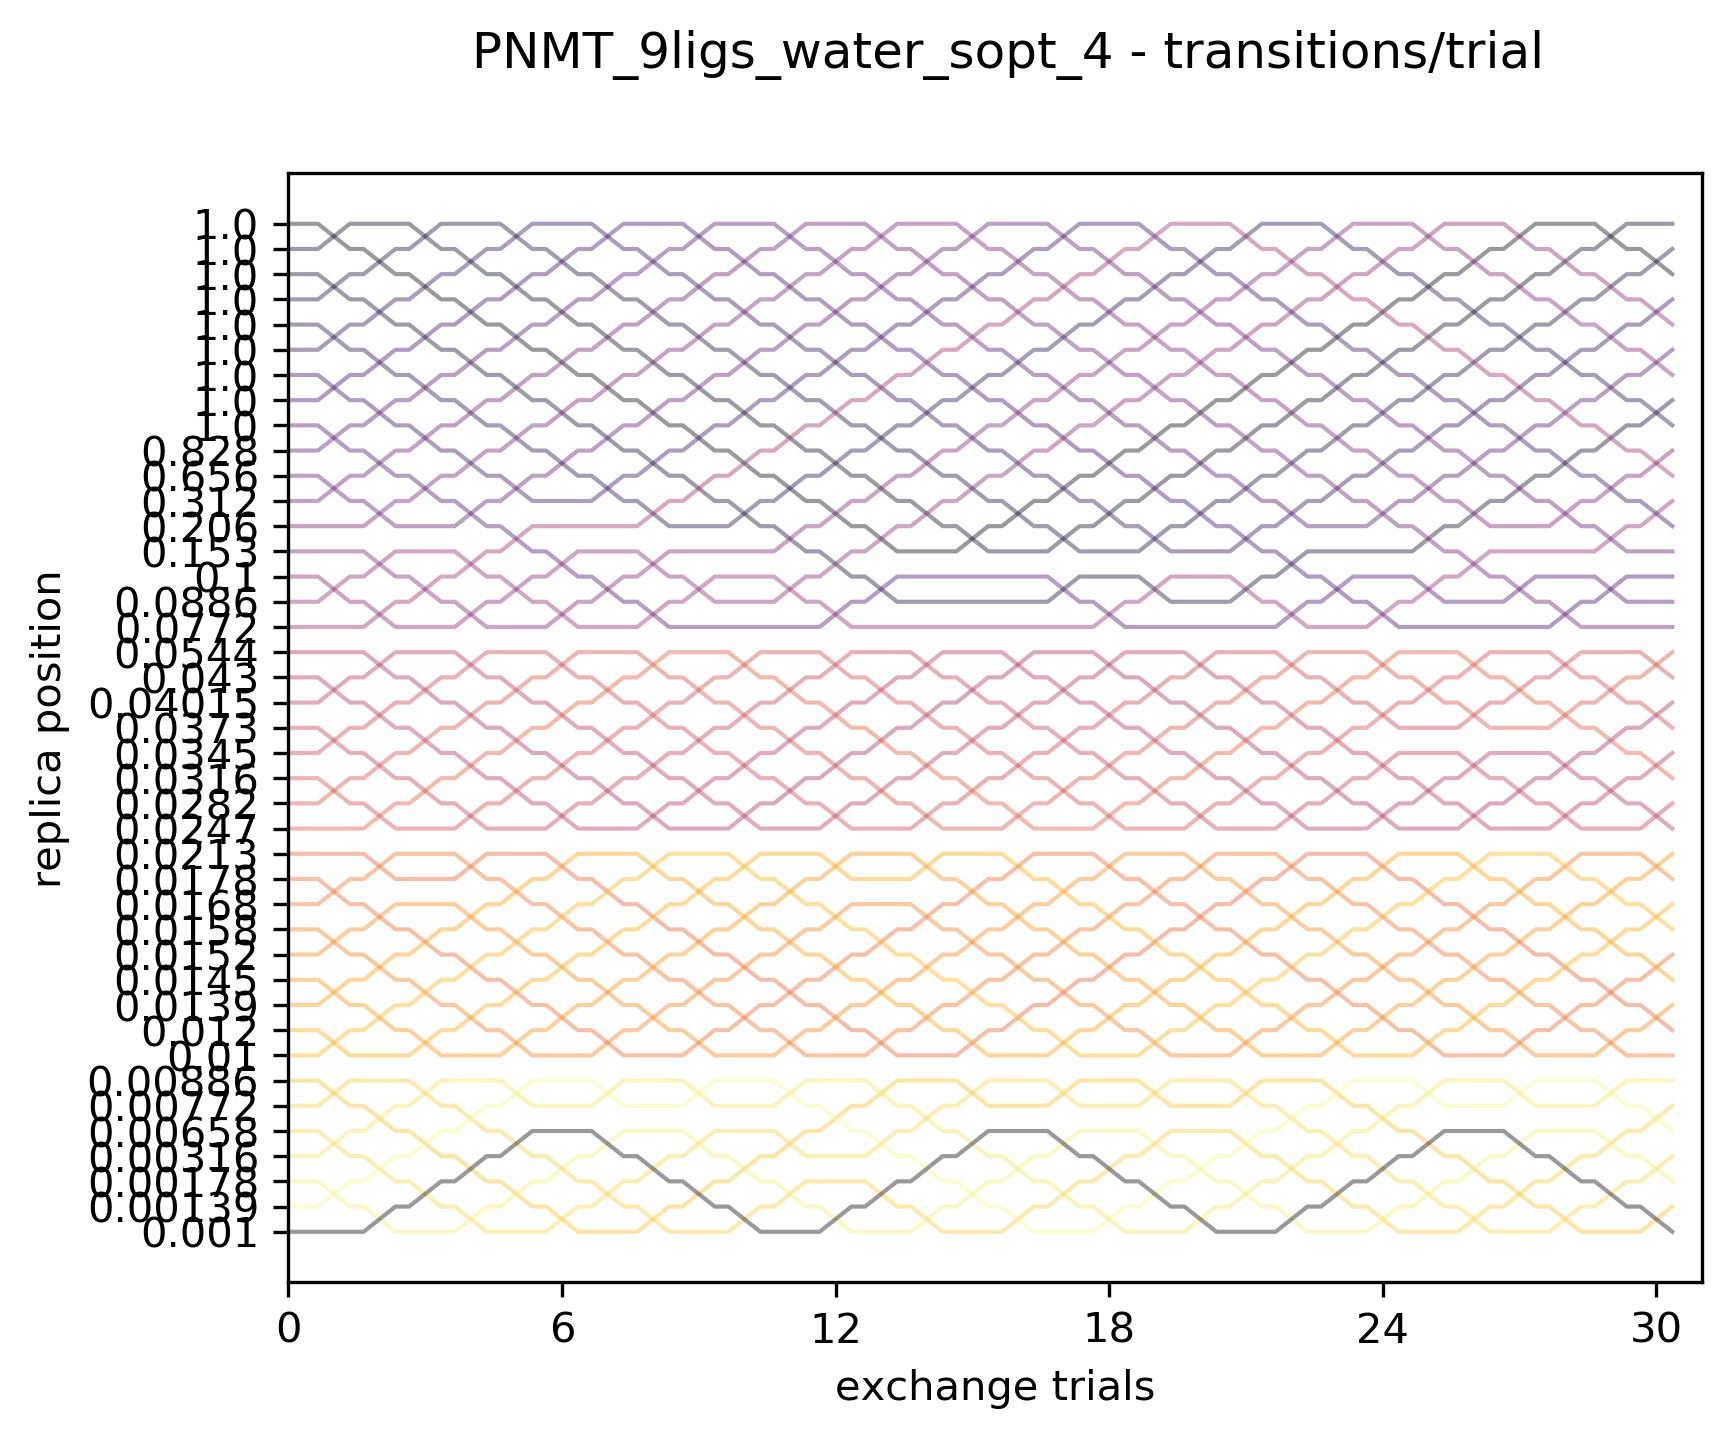

In [47]:
Image(out_sopt_dir+"/sopt4/analysis/plots/transitions.png", width=600)

### Check state switches in the replicas:

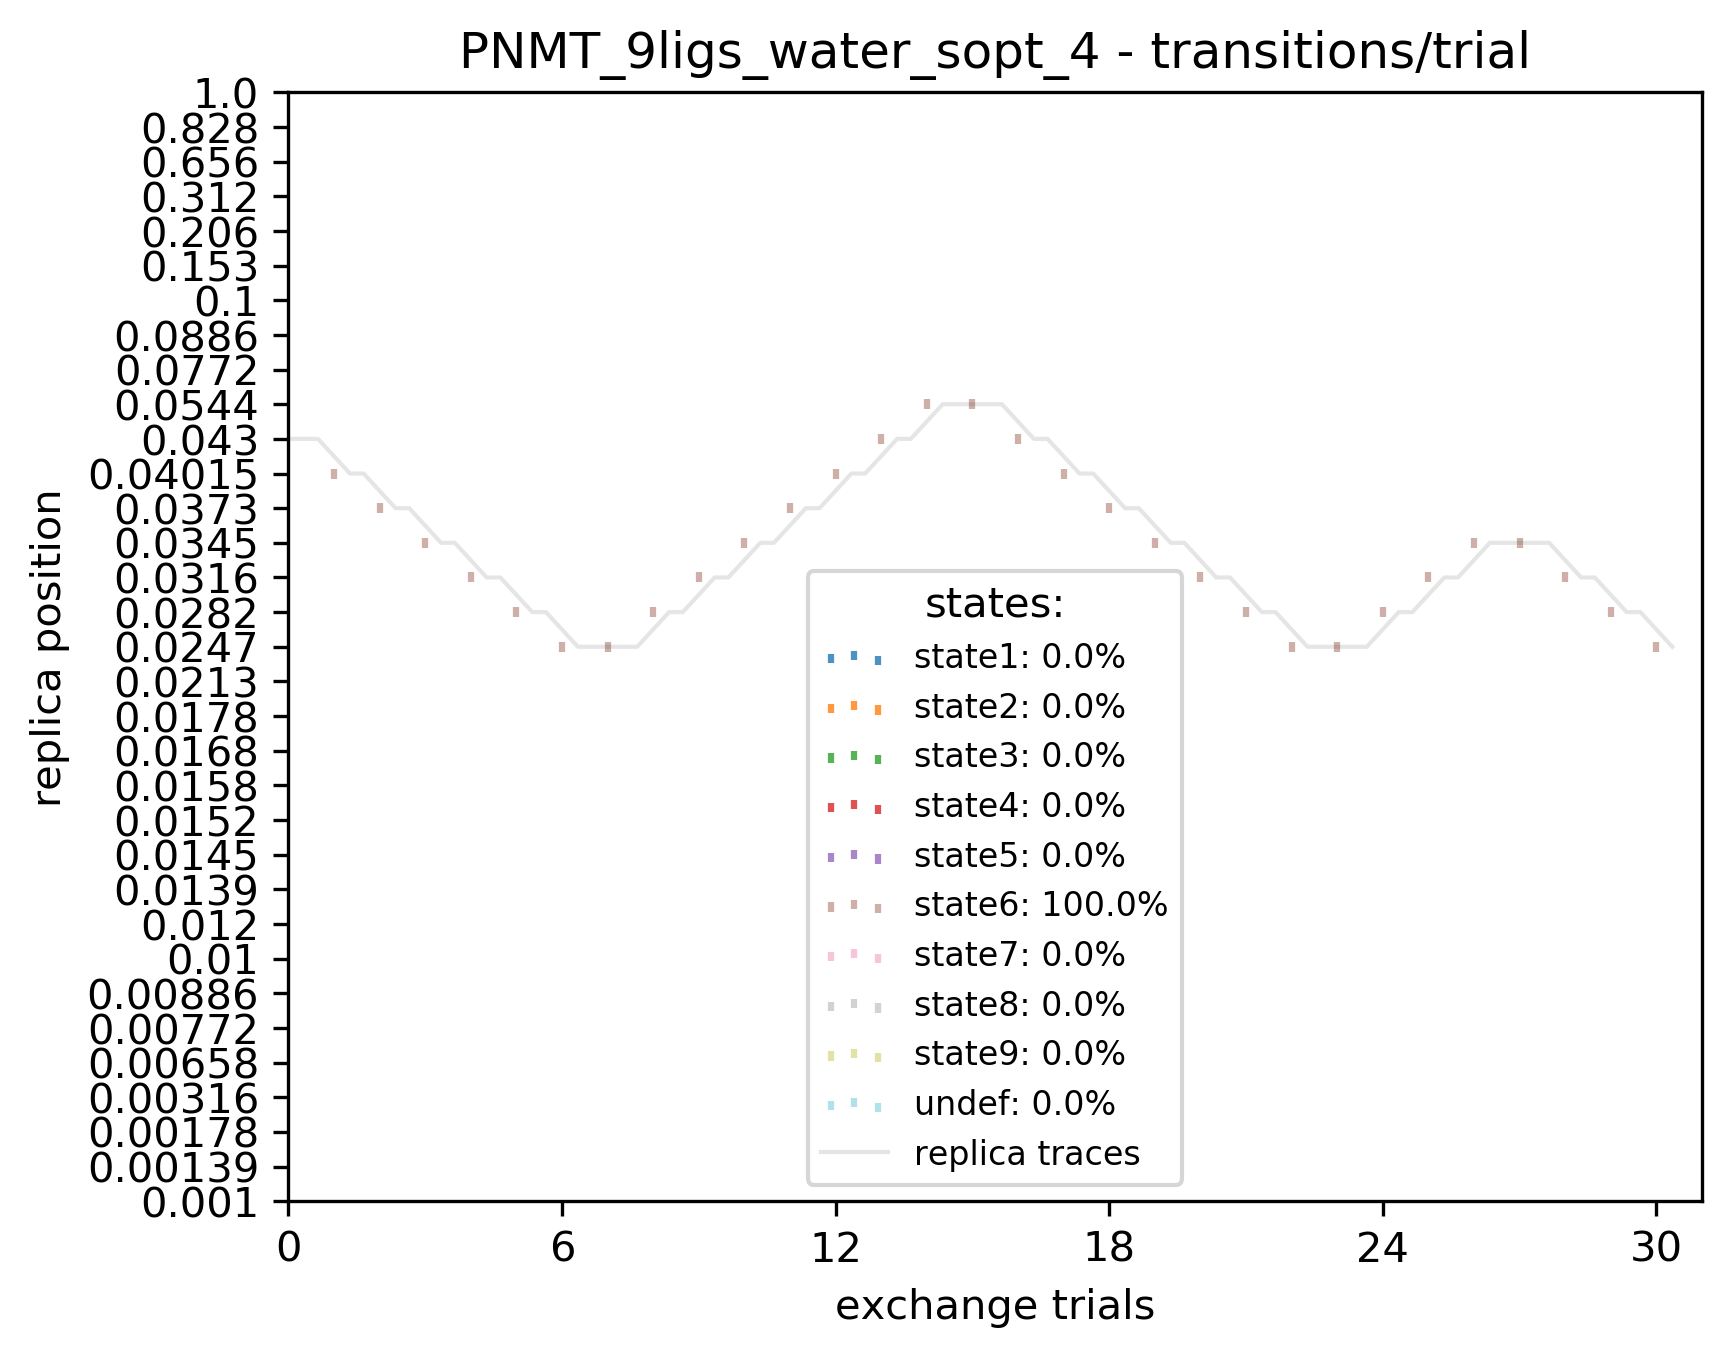

In [49]:
Image(out_sopt_dir+"/sopt4/analysis/plots/transitions_trace_19.png", width=600)

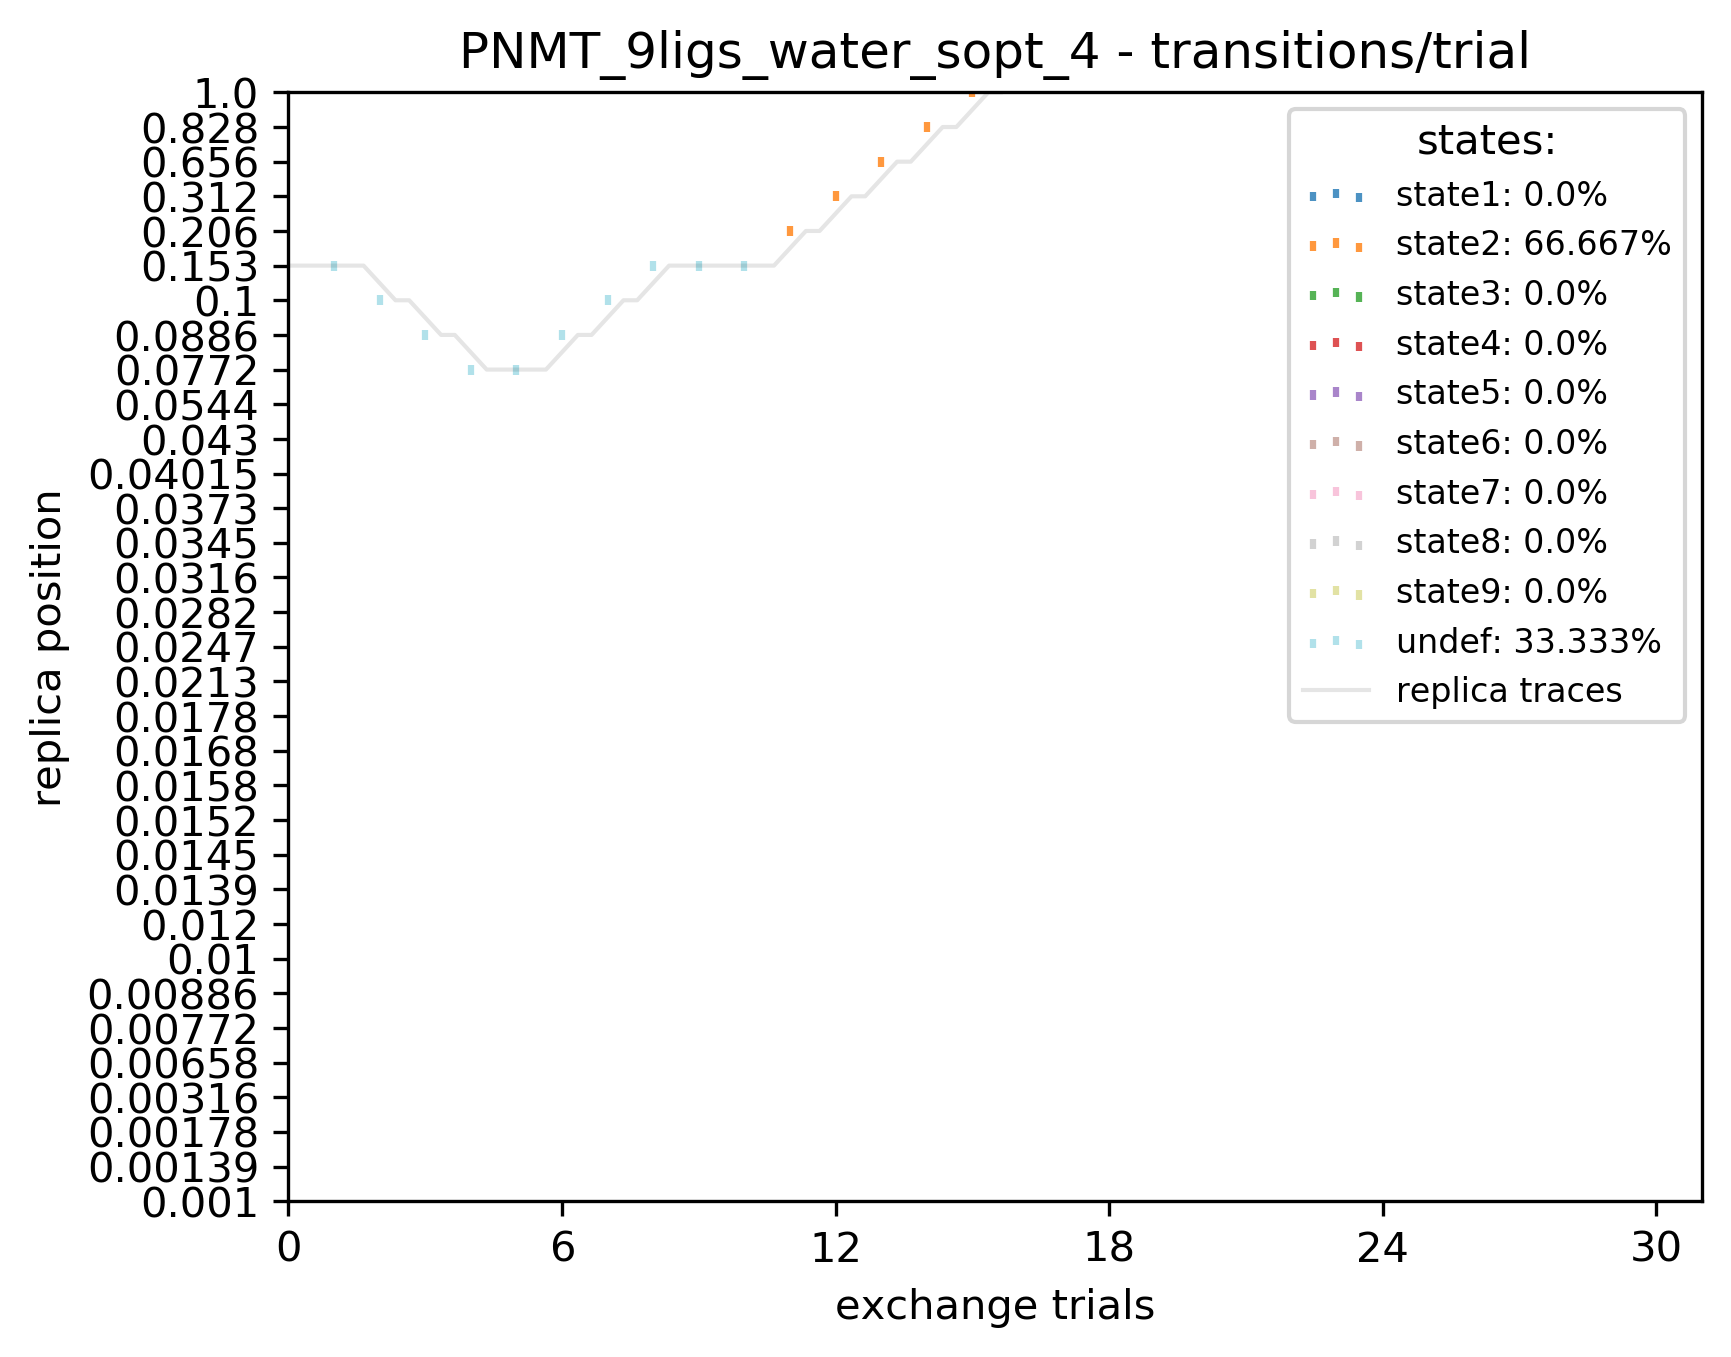

In [53]:
Image(out_sopt_dir+"/sopt4/analysis/plots/transitions_trace_14.png", width=600)

# Production Run

In [ ]:
from reeds.modules import do_RE_EDS_production as production
help(production)

In [58]:
out_production_dir = root_dir+"/test_e_production"
next_production_dir = root_dir+"/0_input/3_next_prod"

name = "PNMT_9ligs_water_prod"

    
out_production_dir = bash.make_folder(out_production_dir)


production_imd = glob.glob(next_production_dir+"/*imd")[0]    
topology = fM.Topology(top_path=in_top_file, disres_path=in_disres_file, pertubation_path=in_pert_file)
system = fM.System(coordinates=glob.glob(next_production_dir+"/*cnf"), name=name, top=topology)

print(system)

System
	name:  PNMT_9ligs_water_prod
	top: 
		Topology
			top_path:  /cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/0_input/PNMT_9lig_water.top
			disres_path:  /cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/0_input/PNMT_9lig_water_disres.dat
			pertubation_path:  /cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/0_input/PNMT_9lig_water.ptp

	coordinates:  /cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/0_input/3_next_prod/PNMT_bs_9_lig_work_17.cnf
	/cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/0_input/3_next_prod/PNMT_bs_9_lig_work_4.cnf
	/cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/0_input/3_next_prod/PNMT_bs_9_lig_work_9.cnf
	/cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/0_input/3_next_prod/PNMT_bs_9_lig_work_6.cnf
	/cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/0_input/3_next_prod/PNMT_bs_9_lig_work_1.cnf
	/cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/0_input/3_next_prod/PNMT_bs_9_lig_work_7.cnf
	/cluster/work/igc/bschroed/REEDS/PNMT/test_PNMT/0_input/3_next_prod/PNMT_bs_

## Job Execution

In [ ]:
last_jobID = production.do(out_root_dir=out_production_dir, 
                           in_simSystem=system, in_template_imd=production_imd, 
                           in_ene_ana_lib_path=ene_ana_lib, verbose=True)

## Analysis


### Check State Sampling

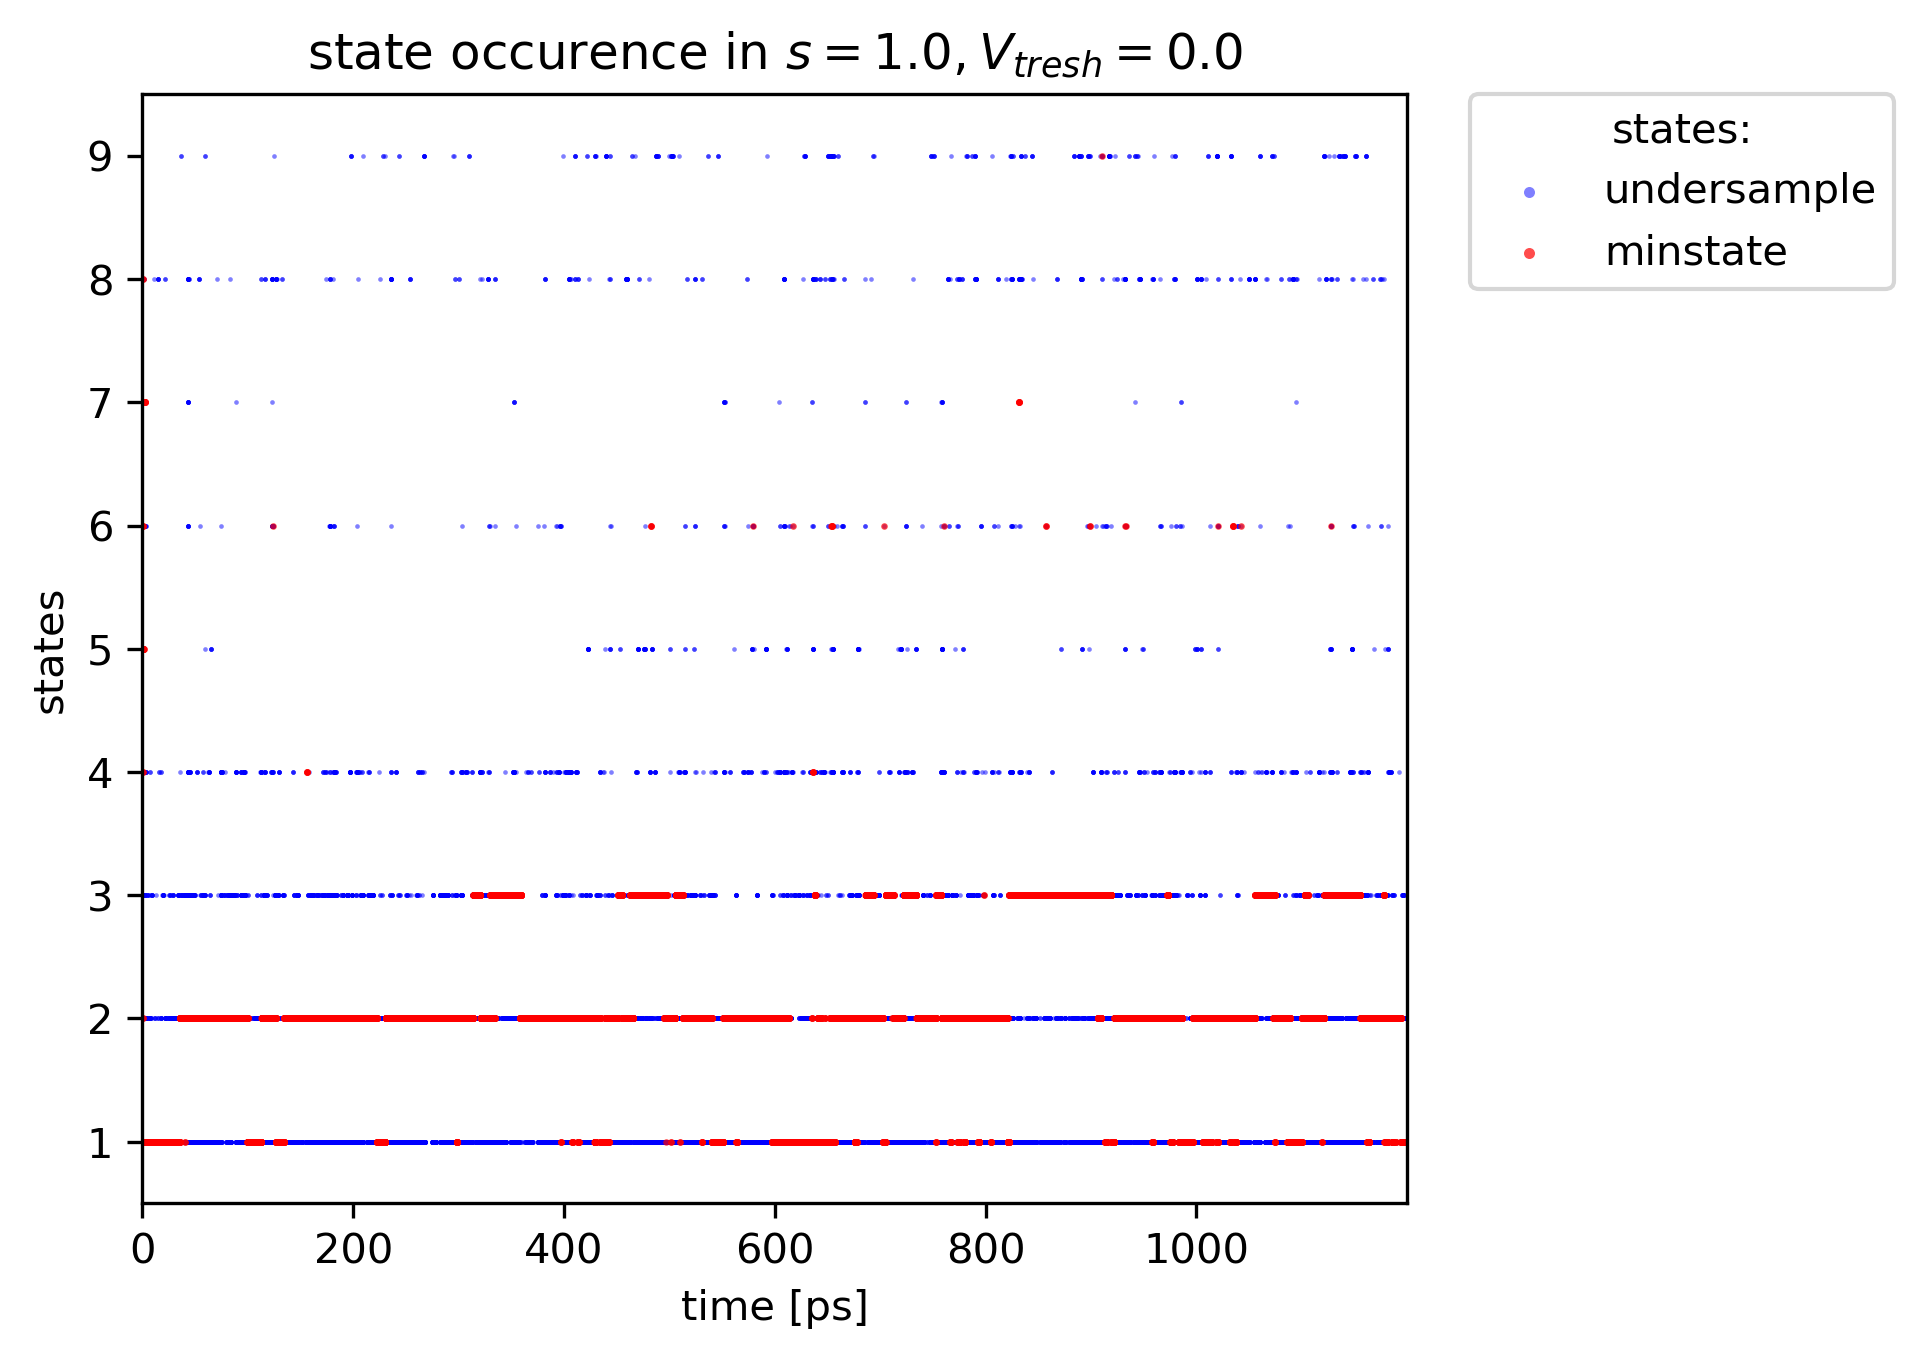

In [60]:
Image(out_production_dir+"/analysis/plots/sampling1.png", width=600)

In [ ]:
Image(out_production_dir+"/analysis/plots/sampling1.png", width=600)

### Calculation of Free Energies

In [114]:
Markdown(out_production_dir+"/analysis/convergence/free_energy_result.dat")


 dF for replica_1
ligname                 1              |              2              |              3              |              4              |              5              |              6              |              7              |              8              |              9              |              R             
ligname             mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err
1                     -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |         4.564         0.651
2                 -5.309         0.700 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |        -0.745         0.256
3                 -3.933         1.044 |         1.376         0.855 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |         0.631         0.815
4                  7.870         1.979 |        13.180         1.586 |        11.804         1.765 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |        12.434         1.565
5                -22.984         2.767 |       -17.675         2.701 |       -19.051         2.810 |       -30.854         3.111 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |       -18.420         2.689
6               -259.008         2.551 |      -253.699         2.491 |      -255.075         2.609 |      -266.878         2.931 |      -236.024         3.656 |            -             -  |            -             -  |            -             -  |            -             -  |      -254.444         2.478
7               -186.513         2.233 |      -181.204         2.491 |      -182.580         2.609 |      -194.383         2.931 |      -163.529         3.656 |        72.495         3.504 |            -             -  |            -             -  |            -             -  |      -181.949         2.478
8                 10.561         2.562 |        15.870         2.491 |        14.494         2.609 |         2.690         2.931 |        33.544         3.656 |       269.568         3.504 |       197.073         3.504 |            -             -  |            -             -  |        15.124         2.478
9                -19.061         2.562 |       -13.752         2.491 |       -15.128         2.580 |       -26.931         2.931 |         3.923         3.656 |       239.947         3.504 |       167.452         3.504 |       -29.621         3.504 |            -             -  |       -14.497         2.478


 dF for replica_2
ligname                 1              |              2              |              3              |              4              |              5              |              6              |              7              |              8              |              9              |              R             
ligname             mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err
1                     -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |         4.562         0.650
2                 -5.307         0.700 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |        -0.745         0.256
3                 -3.931         1.043 |         1.376         0.855 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |         0.631         0.815
4                  7.872         1.979 |        13.179         1.586 |        11.804         1.765 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |        12.434         1.565
5                -22.982         2.766 |       -17.675         2.701 |       -19.051         2.810 |       -30.854         3.111 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |       -18.420         2.689
6               -259.006         2.551 |      -253.699         2.491 |      -255.075         2.609 |      -266.878         2.931 |      -236.024         3.656 |            -             -  |            -             -  |            -             -  |            -             -  |      -254.444         2.478
7               -186.511         2.234 |      -181.204         2.491 |      -182.580         2.609 |      -194.383         2.931 |      -163.529         3.656 |        72.495         3.504 |            -             -  |            -             -  |            -             -  |      -181.949         2.478
8                 10.562         2.562 |        15.869         2.491 |        14.494         2.609 |         2.690         2.931 |        33.544         3.656 |       269.568         3.504 |       197.073         3.504 |            -             -  |            -             -  |        15.124         2.478
9                -19.059         2.562 |       -13.752         2.491 |       -15.128         2.584 |       -26.931         2.931 |         3.923         3.656 |       239.947         3.504 |       167.452         3.504 |       -29.621         3.504 |            -             -  |       -14.497         2.478


 dF for replica_3
ligname                 1              |              2              |              3              |              4              |              5              |              6              |              7              |              8              |              9              |              R             
ligname             mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err
1                     -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |         4.561         0.650
2                 -5.305         0.700 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |        -0.744         0.256
3                 -3.930         1.043 |         1.375         0.855 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |         0.631         0.815
4                  7.874         1.979 |        13.179         1.586 |        11.804         1.765 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |        12.434         1.565
5                -22.980         2.766 |       -17.675         2.701 |       -19.051         2.810 |       -30.854         3.111 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |       -18.420         2.689
6               -259.005         2.553 |      -253.699         2.491 |      -255.075         2.609 |      -266.878         2.931 |      -236.024         3.656 |            -             -  |            -             -  |            -             -  |            -             -  |      -254.444         2.478
7               -186.510         2.234 |      -181.205         2.491 |      -182.580         2.609 |      -194.383         2.931 |      -163.529         3.656 |        72.495         3.504 |            -             -  |            -             -  |            -             -  |      -181.949         2.478
8                 10.564         2.562 |        15.869         2.491 |        14.494         2.609 |         2.690         2.931 |        33.544         3.656 |       269.568         3.504 |       197.073         3.504 |            -             -  |            -             -  |        15.124         2.478
9                -28.736         2.562 |       -23.431         2.491 |       -24.806         2.584 |       -36.609         2.931 |        -5.755         3.656 |       230.269         3.504 |       157.774         3.504 |       -39.299         3.504 |            -             -  |       -24.175         2.478


 dF for replica_4
ligname                 1              |              2              |              3              |              4              |              5              |              6              |              7              |              8              |              9              |              R             
ligname             mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err
1                     -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |         4.559         0.650
2                 -5.303         0.699 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |        -0.744         0.256
3                 -3.928         1.043 |         1.375         0.855 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |         0.631         0.815
4                  8.136         2.057 |        13.439         1.692 |        12.064         1.861 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |        12.695         1.672
5                -22.978         2.766 |       -17.676         2.701 |       -19.051         2.810 |       -31.115         3.167 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |       -18.420         2.689
6               -259.003         2.553 |      -253.700         2.491 |      -255.075         2.609 |      -267.139         2.990 |      -236.024         3.656 |            -             -  |            -             -  |            -             -  |            -             -  |      -254.444         2.478
7               -186.508         2.234 |      -181.205         2.491 |      -182.580         2.609 |      -194.644         2.989 |      -163.529         3.656 |        72.495         3.504 |            -             -  |            -             -  |            -             -  |      -181.949         2.478
8                 10.566         2.562 |        15.868         2.491 |        14.494         2.609 |         2.429         2.989 |        33.544         3.656 |       269.568         3.504 |       197.073         3.504 |            -             -  |            -             -  |        15.124         2.478
9                -28.734         2.562 |       -23.431         2.491 |       -24.806         2.584 |       -36.870         2.990 |        -5.755         3.656 |       230.269         3.504 |       157.774         3.504 |       -39.299         3.504 |            -             -  |       -24.175         2.478


 dF for replica_5
ligname                 1              |              2              |              3              |              4              |              5              |              6              |              7              |              8              |              9              |              R             
ligname             mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err
1                     -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |         4.556         0.649
2                 -5.299         0.699 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |        -0.743         0.256
3                 -3.925         1.043 |         1.374         0.855 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |         0.631         0.815
4                  8.431         2.200 |        13.730         1.874 |        12.356         2.027 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |        12.987         1.856
5                -22.976         2.766 |       -17.677         2.701 |       -19.051         2.810 |       -31.407         3.267 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |       -18.420         2.689
6               -259.000         2.553 |      -253.700         2.491 |      -255.075         2.609 |      -267.430         3.096 |      -236.023         3.656 |            -             -  |            -             -  |            -             -  |            -             -  |      -254.444         2.478
7               -186.508         2.225 |      -181.209         2.488 |      -182.583         2.606 |      -194.939         3.093 |      -163.532         3.654 |        72.492         3.502 |            -             -  |            -             -  |            -             -  |      -181.952         2.474
8                 10.568         2.562 |        15.868         2.491 |        14.494         2.609 |         2.138         3.096 |        33.545         3.656 |       269.568         3.504 |       197.077         3.502 |            -             -  |            -             -  |        15.124         2.478
9                -27.753         2.562 |       -22.453         2.491 |       -23.828         2.584 |       -36.183         3.096 |        -4.776         3.656 |       231.247         3.504 |       158.756         3.502 |       -38.321         3.504 |            -             -  |       -23.197         2.478


 dF for replica_6
ligname                 1              |              2              |              3              |              4              |              5              |              6              |              7              |              8              |              9              |              R             
ligname             mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err
1                     -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |         4.554         0.649
2                 -5.297         0.699 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |        -0.743         0.256
3                 -3.923         1.043 |         1.374         0.855 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |         0.631         0.815
4                  8.433         2.203 |        13.730         1.876 |        12.356         2.030 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |        12.987         1.858
5                -22.974         2.766 |       -17.678         2.701 |       -19.051         2.810 |       -31.407         3.268 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |       -18.420         2.689
6               -258.998         2.552 |      -253.701         2.491 |      -255.075         2.609 |      -267.431         3.097 |      -236.023         3.656 |            -             -  |            -             -  |            -             -  |            -             -  |      -254.444         2.478
7               -186.506         2.226 |      -181.209         2.488 |      -182.583         2.606 |      -194.939         3.095 |      -163.532         3.654 |        72.492         3.502 |            -             -  |            -             -  |            -             -  |      -181.952         2.474
8                 10.571         2.561 |        15.867         2.491 |        14.494         2.609 |         2.138         3.097 |        33.545         3.656 |       269.568         3.504 |       197.077         3.504 |            -             -  |            -             -  |        15.124         2.478
9                -27.750         2.562 |       -22.454         2.491 |       -23.828         2.584 |       -36.183         3.097 |        -4.776         3.656 |       231.247         3.504 |       158.756         3.502 |       -38.321         3.504 |            -             -  |       -23.197         2.478


 dF for replica_7
ligname                 1              |              2              |              3              |              4              |              5              |              6              |              7              |              8              |              9              |              R             
ligname             mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err
1                     -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |         4.553         0.649
2                 -5.295         0.699 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |        -0.742         0.256
3                 -3.922         1.043 |         1.373         0.855 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |         0.631         0.815
4                  8.434         2.202 |        13.729         1.875 |        12.356         2.028 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |        12.987         1.857
5                -22.972         2.766 |       -17.677         2.701 |       -19.050         2.810 |       -31.407         3.268 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |       -18.420         2.689
6               -258.996         2.552 |      -253.701         2.491 |      -255.075         2.609 |      -267.431         3.096 |      -236.024         3.656 |            -             -  |            -             -  |            -             -  |            -             -  |      -254.444         2.478
7               -186.532         2.227 |      -181.237         2.489 |      -182.610         2.607 |      -194.966         3.095 |      -163.560         3.655 |        72.465         3.503 |            -             -  |            -             -  |            -             -  |      -181.979         2.476
8                 10.572         2.561 |        15.867         2.491 |        14.494         2.609 |         2.138         3.096 |        33.544         3.656 |       269.568         3.504 |       197.104         3.503 |            -             -  |            -             -  |        15.124         2.478
9                -31.162         2.561 |       -25.867         2.491 |       -27.240         2.581 |       -39.596         3.096 |        -8.190         3.656 |       227.835         3.504 |       155.370         3.503 |       -41.734         3.504 |            -             -  |       -26.609         2.478


 dF for replica_8
ligname                 1              |              2              |              3              |              4              |              5              |              6              |              7              |              8              |              9              |              R             
ligname             mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err
1                     -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |         4.552         0.649
2                 -5.295         0.698 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |        -0.743         0.256
3                 -3.921         1.042 |         1.374         0.855 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |         0.632         0.815
4                  8.432         2.201 |        13.727         1.876 |        12.353         2.029 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |        12.984         1.858
5                -22.972         2.766 |       -17.677         2.701 |       -19.051         2.810 |       -31.404         3.268 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |       -18.420         2.689
6               -258.996         2.553 |      -253.701         2.491 |      -255.075         2.609 |      -267.428         3.097 |      -236.024         3.656 |            -             -  |            -             -  |            -             -  |            -             -  |      -254.444         2.478
7               -186.531         2.227 |      -181.237         2.489 |      -182.611         2.607 |      -194.964         3.096 |      -163.560         3.655 |        72.464         3.503 |            -             -  |            -             -  |            -             -  |      -181.979         2.476
8                 12.290         2.561 |        17.585         2.491 |        16.210         2.609 |         3.858         3.097 |        35.262         3.656 |       271.286         3.504 |       198.821         3.503 |            -             -  |            -             -  |        16.842         2.478
9                -31.161         2.561 |       -25.867         2.491 |       -27.241         2.584 |       -39.594         3.097 |        -8.190         3.656 |       227.835         3.504 |       155.370         3.503 |       -43.451         3.504 |            -             -  |       -26.609         2.478


 dF for replica_9
ligname                 1              |              2              |              3              |              4              |              5              |              6              |              7              |              8              |              9              |              R             
ligname             mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err
1                     -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |         4.550         0.648
2                 -5.293         0.698 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |        -0.743         0.257
3                 -3.918         1.042 |         1.375         0.856 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |         0.632         0.816
4                  8.434         2.200 |        13.727         1.877 |        12.352         2.030 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |        12.984         1.859
5                -22.970         2.766 |       -17.677         2.701 |       -19.052         2.810 |       -31.404         3.269 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |       -18.420         2.689
6               -258.994         2.553 |      -253.701         2.491 |      -255.076         2.609 |      -267.428         3.098 |      -236.024         3.656 |            -             -  |            -             -  |            -             -  |            -             -  |      -254.444         2.478
7               -187.250         1.809 |      -181.958         2.115 |      -183.332         2.252 |      -195.684         2.804 |      -164.280         3.017 |        71.744         3.247 |            -             -  |            -             -  |            -             -  |      -182.700         2.099
8                 52.385         2.554 |        57.678         2.484 |        56.304         2.014 |        43.952         3.092 |        75.355         3.651 |       311.380         3.499 |       239.636         3.242 |            -             -  |            -             -  |        56.936         2.470
9                -34.206         2.561 |       -28.913         2.491 |       -30.288         2.580 |       -42.640         3.097 |       -11.236         3.656 |       224.788         3.504 |       153.045         3.247 |       -86.591         3.499 |            -             -  |       -29.655         2.477


 dF for replica_10
ligname                 1              |              2              |              3              |              4              |              5              |              6              |              7              |              8              |              9              |              R             
ligname             mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err
1                     -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |         4.569         0.651
2                 -5.285         0.701 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |        -0.716         0.258
3                 -3.917         1.046 |         1.368         0.858 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |         0.652         0.818
4                  9.376         2.197 |        14.661         1.970 |        13.293         2.117 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |        13.945         1.953
5                -22.846         2.760 |       -17.561         2.694 |       -18.929         2.804 |       -32.222         3.318 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |       -18.277         2.682
6               -212.829         2.562 |      -207.544         2.491 |      -208.912         2.609 |      -222.205         3.155 |      -189.983         0.204 |            -             -  |            -             -  |            -             -  |            -             -  |      -208.261         2.478
7               -187.267         1.806 |      -181.982         2.116 |      -183.351         2.254 |      -196.643         2.868 |      -164.421         2.988 |        25.562         2.911 |            -             -  |            -             -  |            -             -  |      -182.699         2.100
8                 52.417         2.555 |        57.703         2.484 |        56.334         2.004 |        43.042         3.149 |        75.264         3.646 |       265.247         3.499 |       239.685         3.242 |            -             -  |            -             -  |        56.986         2.470
9                -34.223         2.562 |       -28.938         2.491 |       -30.306         2.581 |       -43.599         3.155 |       -11.377         3.651 |       178.607         3.503 |       153.045         3.248 |       -86.640         3.498 |            -             -  |       -29.654         2.477


 dF for replica_11
ligname                 1              |              2              |              3              |              4              |              5              |              6              |              7              |              8              |              9              |              R             
ligname             mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err
1                     -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |         5.417         0.815
2                 -5.087         0.938 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |         0.329         0.464
3                 -3.745         1.246 |         1.343         1.051 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |         1.672         0.942
4                 18.711         1.959 |        23.799         1.841 |        22.456         2.015 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |        24.128         1.781
5                 18.606         2.013 |        23.694         1.899 |        22.351         2.068 |        -0.105         2.562 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |        24.023         1.841
6               -211.315         2.532 |      -206.228         2.442 |      -207.571         2.576 |      -230.027         2.987 |      -229.922         3.023 |            -             -  |            -             -  |            -             -  |            -             -  |      -205.899         2.397
7               -187.714         2.062 |      -182.627         2.521 |      -183.969         2.651 |      -206.426         3.052 |      -206.321         3.087 |        23.601         3.448 |            -             -  |            -             -  |            -             -  |      -182.298         2.478
8                 41.652         2.282 |        46.740         2.182 |        45.397         2.330 |        22.941         2.778 |        23.046         2.540 |       252.968         3.152 |       229.367         3.268 |            -             -  |            -             -  |        47.069         2.131
9                -40.447         2.608 |       -35.359         2.521 |       -36.702         2.640 |       -59.158         3.052 |       -59.053         3.087 |       170.869         3.448 |       147.268         3.504 |       -82.099         3.269 |            -             -  |       -35.030         2.478


 dF for replica_12
ligname                 1              |              2              |              3              |              4              |              5              |              6              |              7              |              8              |              9              |              R             
ligname             mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err
1                     -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |        74.379         1.881
2                 -1.724         1.594 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |        72.655         0.784
3                 -5.949         2.713 |        -4.225         2.106 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |        68.430         1.955
4                 13.947         2.810 |        15.671         2.230 |        19.896         2.860 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |        88.326         2.088
5                -24.472         2.081 |       -22.749         1.186 |       -18.523         2.148 |       -38.419         2.269 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |        49.907         0.889
6               -307.748         2.740 |      -306.024         2.141 |      -301.799         2.791 |      -321.695         2.886 |      -283.276         2.182 |            -             -  |            -             -  |            -             -  |            -             -  |      -233.369         1.992
7               -350.529         3.019 |      -348.805         2.488 |      -344.580         3.065 |      -364.476         3.152 |      -326.056         2.523 |       -42.781         3.089 |            -             -  |            -             -  |            -             -  |      -276.150         2.361
8                  6.443         2.894 |         8.167         2.335 |        12.393         2.942 |        -7.503         3.032 |        30.916         2.372 |       314.192         2.968 |       356.972         3.227 |            -             -  |            -             -  |        80.823         2.199
9                -83.931         3.108 |       -82.207         2.595 |       -77.982         3.153 |       -97.878         3.237 |       -59.459         2.629 |       223.817         3.176 |       266.598         3.420 |       -90.375         3.310 |            -             -  |        -9.552         2.474


 dF for replica_13
ligname                 1              |              2              |              3              |              4              |              5              |              6              |              7              |              8              |              9              |              R             
ligname             mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err
1                     -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |       214.298         1.834
2                  8.582         0.642 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |       222.880         1.196
3                  7.981         2.557 |        -0.601         2.142 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |       222.279         1.781
4                  9.570         1.525 |         0.988         0.697 |         1.589         2.600 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |       223.868         1.893
5                -30.843         2.398 |       -39.425         1.954 |       -38.824         2.358 |       -40.413         3.173 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |       183.455         1.545
6               -309.214         2.859 |      -317.796         2.499 |      -317.195         2.826 |      -318.784         2.898 |      -278.371         2.683 |            -             -  |            -             -  |            -             -  |            -             -  |       -94.916         2.194
7               -344.217         2.268 |      -352.799         1.792 |      -352.198         2.226 |      -353.787         2.316 |      -313.374         2.041 |       -35.003         2.568 |            -             -  |            -             -  |            -             -  |      -129.919         1.334
8                  7.213         3.039 |        -1.369         2.633 |        -0.768         3.050 |        -2.357         3.117 |        38.056         2.918 |       316.427         3.308 |       351.430         2.812 |            -             -  |            -             -  |       221.511         2.476
9                -74.992         2.417 |       -83.574         1.977 |       -82.973         2.378 |       -84.562         2.463 |       -44.149         2.206 |       234.221         2.700 |       269.225         2.064 |       -82.205         2.934 |            -             -  |       139.306         1.574


 dF for replica_14
ligname                 1              |              2              |              3              |              4              |              5              |              6              |              7              |              8              |              9              |              R             
ligname             mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err
1                     -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |       390.147         2.478
2                 13.907         0.017 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |       404.055         2.483
3                 80.116         3.196 |        66.209         3.200 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |       470.264         2.018
4                -11.167         0.020 |       -25.075         0.030 |       -91.283         3.196 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |       378.980         2.478
5                 34.810         0.040 |        20.902         0.111 |       -45.306         3.168 |        45.977         0.046 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |       424.957         2.442
6               -249.851         3.503 |      -263.758         3.507 |      -329.967         3.195 |      -238.683         3.503 |      -284.660         3.478 |            -             -  |            -             -  |            -             -  |            -             -  |       140.297         2.477
7               -276.232         2.701 |      -290.139         2.706 |      -356.348         2.286 |      -265.064         2.701 |      -311.041         2.668 |       -26.381         2.700 |            -             -  |            -             -  |            -             -  |       113.916         1.074
8                 44.616         3.533 |        30.709         3.508 |       -35.500         3.196 |        55.783         3.504 |         9.806         4.484 |       294.467         3.503 |       320.848         2.701 |            -             -  |            -             -  |       434.764         2.478
9                -14.484         3.163 |       -28.392         3.168 |       -94.600         2.818 |        -3.317         3.163 |       -49.294         3.135 |       235.366         3.163 |       261.747         2.241 |       -59.100         3.163 |            -             -  |       375.663         1.967


 dF for replica_15
ligname                 1              |              2              |              3              |              4              |              5              |              6              |              7              |              8              |              9              |              R             
ligname             mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err
1                     -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |      1215.294         2.478
2                 81.344         0.020 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |      1296.638         2.478
3                425.722         3.433 |       344.378         3.433 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |      1641.016         2.375
4                 -4.583         0.000 |       -85.927         0.020 |      -430.305         3.433 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |      1210.711         2.478
5                 63.934         0.000 |       -17.410         0.020 |      -361.788         3.433 |        68.516         0.000 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |      1279.228         2.478
6               -146.285         0.020 |      -227.629         0.000 |      -572.007         3.433 |      -141.703         0.020 |      -210.219         0.020 |            -             -  |            -             -  |            -             -  |            -             -  |      1069.008         2.478
7                 20.590         3.504 |       -60.754         4.955 |      -405.132         3.433 |        25.173         3.504 |       -43.344         3.504 |       166.876         4.955 |            -             -  |            -             -  |            -             -  |      1235.884         2.478
8                271.197         3.504 |       189.853         3.504 |      -154.525         3.433 |       275.780         3.504 |       207.263         3.504 |       417.482         4.955 |       250.607         0.000 |            -             -  |            -             -  |      1486.491         2.478
9                340.811         3.192 |       259.467         3.192 |       -84.911         3.113 |       345.393         3.192 |       276.877         3.192 |       487.096         3.192 |       320.221         3.192 |        69.614         3.192 |            -             -  |      1556.105         2.012


 dF for replica_16
ligname                 1              |              2              |              3              |              4              |              5              |              6              |              7              |              8              |              9              |              R             
ligname             mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err
1                     -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |      2192.400         2.478
2                 81.346         0.000 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |      2273.746         2.478
3                706.587         3.342 |       625.241         3.342 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |      2898.986         2.243
4                 -4.583         0.000 |       -85.929         0.000 |      -711.169         3.342 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |      2187.817         2.478
5                 63.934         0.000 |       -17.412         0.000 |      -642.653         3.342 |        68.516         0.000 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |      2256.334         2.478
6               -146.258         0.000 |      -227.604         0.000 |      -852.845         3.342 |      -141.675         0.000 |      -210.192         0.000 |            -             -  |            -             -  |            -             -  |            -             -  |      2046.142         2.478
7                371.569         3.908 |       290.223         3.908 |      -335.018         3.471 |       376.151         3.908 |       307.635         3.908 |       517.826         3.908 |            -             -  |            -             -  |            -             -  |      2563.968         3.023
8                530.741         3.504 |       449.395         3.504 |      -175.846         3.359 |       535.323         3.504 |       466.807         3.504 |       676.999         3.504 |       159.172         3.910 |            -             -  |            -             -  |      2723.140         2.478
9                698.576         3.184 |       617.230         3.184 |        -8.011         3.005 |       703.159         3.184 |       634.642         3.184 |       844.834         3.184 |       327.008         3.624 |       167.835         3.184 |            -             -  |      2890.976         2.000


 dF for replica_17
ligname                 1              |              2              |              3              |              4              |              5              |              6              |              7              |              8              |              9              |              R             
ligname             mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err |          mean           err
1                     -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |      3967.575         2.478
2                 82.339         0.000 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |      4049.913         2.478
3               1222.884         4.955 |      1140.545         4.955 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |      5190.459         2.478
4                 -9.198         0.000 |       -91.537         0.000 |     -1232.083         4.955 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |      3958.376         2.478
5                 57.960         0.000 |       -24.379           nan |     -1164.924         4.955 |        67.159         0.000 |            -             -  |            -             -  |            -             -  |            -             -  |            -             -  |      4025.535         2.478
6               -197.882           nan |      -280.221         0.000 |     -1420.766         4.955 |      -188.683           nan |      -255.842           nan |            -             -  |            -             -  |            -             -  |            -             -  |      3769.693         2.478
7                737.000         3.504 |       654.661         3.504 |      -485.885         3.504 |       746.198         3.504 |       679.040         3.504 |       934.882         3.504 |            -             -  |            -             -  |            -             -  |      4704.574         2.478
8               1029.441         3.504 |       947.102         3.504 |      -193.444         3.504 |      1038.639         3.504 |       971.481         3.504 |      1227.322         3.504 |       292.441         0.000 |            -             -  |            -             -  |      4997.015         2.478
9               1308.888         3.178 |      1226.550         3.178 |        86.004         3.178 |      1318.087         3.178 |      1250.928         3.178 |      1506.770         3.178 |       571.889         3.178 |       279.448         3.178 |            -             -  |      5276.463         1.990




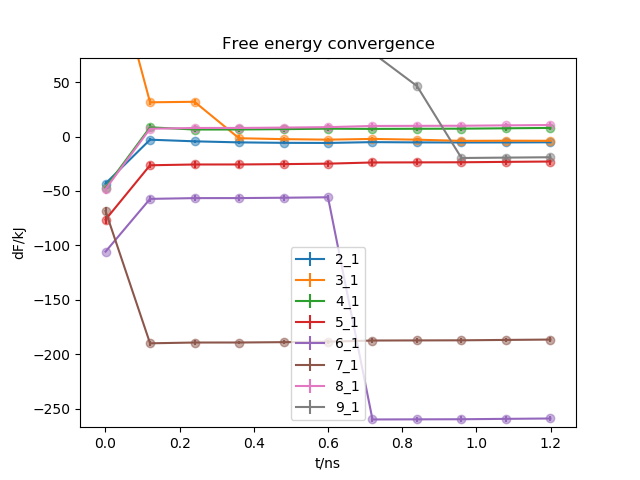

In [59]:
Image(out_production_dir+"/analysis/convergence/PNMT_9ligs_water_prod_replica_1.png", width=600)

In [ ]:
display.